# PPProjecct

In [ ]:
!pip install probaforms -U

## Data

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train_cache.csv')
train.head()

iops        lat  block_size  n_jobs  iodepth  read_fraction load_type  \
0  712511  386627.74           8      46        6            100    random   
1  709311  388112.33           8      46        6            100    random   
2  712464  386384.72           8      46        6            100    random   
3  711226  387053.72           8      46        6            100    random   
4  710919  387191.78           8      46        6            100    random   

  io_type raid  n_disks device_type  offset                         id  
0    read  4+1       24        nvme       0  hse-09142022-013313-z3769  
1    read  4+1       24        nvme       0  hse-09142022-013313-z3769  
2    read  4+1       24        nvme       0  hse-09142022-013313-z3769  
3    read  4+1       24        nvme       0  hse-09142022-013313-z3769  
4    read  4+1       24        nvme       0  hse-09142022-013313-z3769

In [4]:
test = pd.read_csv('test_cache.csv')
test.head()

iops        lat  block_size  n_jobs  iodepth  read_fraction load_type  \
0  21483  613944.00         256       8        4             45    random   
1  21354  610190.00         256       8        4             45    random   
2  20883  613910.75         256       8        4             45    random   
3  21493  610052.62         256       8        4             45    random   
4  21473  606866.62         256       8        4             45    random   

  io_type raid  n_disks device_type  offset                          id  
0    read  4+1       24        nvme       0  hse-09132022-180712-z63065  
1    read  4+1       24        nvme       0  hse-09132022-180712-z63065  
2    read  4+1       24        nvme       0  hse-09132022-180712-z63065  
3    read  4+1       24        nvme       0  hse-09132022-180712-z63065  
4    read  4+1       24        nvme       0  hse-09132022-180712-z63065

In [5]:
pd.unique(train[['block_size']]. values.ravel())

array([  8,  16,  32,  64, 256,   4, 128])

In [6]:
pd.unique(train[['n_jobs']]. values.ravel()).size

32

In [7]:
pd.unique(train[['iodepth']]. values.ravel()).size

16

In [8]:
pd.unique(train[['read_fraction']]. values.ravel()).size

101

In [9]:
pd.unique(train[['io_type']]. values.ravel())

array(['read', 'write'], dtype=object)

In [10]:
pd.unique(train[['id']]. values.ravel()).size

408

In [11]:
test['id'] = test['id'] + '-' + test['io_type']

In [12]:
test['io_type_num'] = test['io_type'] == 'write'

In [13]:
test.io_type_num = test.io_type_num.replace({ True : 1 , False : 0 })

In [14]:
y_test = torch.tensor(test[['iops', 'lat']].values)

In [15]:
X_test = torch.tensor(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [16]:
print(len(y_test), len(X_test))

12120 12120


In [17]:
train['id'] = train['id'] + '-' + train['io_type']

In [18]:
train['io_type_num'] = train['io_type'] == 'write'

In [19]:
train.io_type_num = train.io_type_num.replace({ True : 1 , False : 0 })

In [20]:
y_tr = torch.tensor(train[['iops', 'lat']].values)

In [21]:
X_tr = torch.tensor(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

In [22]:
pd.unique(train[['id']]. values.ravel())

array(['hse-09142022-013313-z3769-read',
       'hse-09132022-220621-z47654-read',
       'hse-09132022-220621-z47654-write',
       'hse-09132022-145656-z44664-read',
       'hse-09132022-145656-z44664-write',
       'hse-09132022-114106-z26207-read',
       'hse-09132022-114106-z26207-write',
       'hse-09132022-193036-z66798-read',
       'hse-09132022-193036-z66798-write',
       'hse-09132022-144055-z72468-read',
       'hse-09132022-144055-z72468-write',
       'hse-09132022-204254-z78794-read',
       'hse-09132022-204254-z78794-write',
       'hse-09132022-225919-z97534-read',
       'hse-09132022-225919-z97534-write',
       'hse-09132022-231343-z49201-read',
       'hse-09132022-231343-z49201-write',
       'hse-09142022-005311-z97289-read',
       'hse-09142022-005311-z97289-write',
       'hse-09132022-181650-z73563-read',
       'hse-09132022-181650-z73563-write',
       'hse-09132022-183252-z8604-read',
       'hse-09132022-183252-z8604-write',
       'hse-09132022-23120

In [23]:
pd.unique(test[['id']]. values.ravel())

array(['hse-09132022-180712-z63065-read',
       'hse-09132022-180712-z63065-write',
       'hse-09132022-212616-z36709-read',
       'hse-09132022-212616-z36709-write',
       'hse-09132022-203942-z36542-read',
       'hse-09132022-203942-z36542-write',
       'hse-09132022-113615-z47578-read',
       'hse-09132022-113615-z47578-write',
       'hse-09132022-113127-z92275-read',
       'hse-09132022-113127-z92275-write',
       'hse-09132022-202959-z97080-read',
       'hse-09132022-202959-z97080-write',
       'hse-09132022-130756-z72964-read',
       'hse-09132022-130756-z72964-write',
       'hse-09132022-152621-z23474-read',
       'hse-09132022-152621-z23474-write',
       'hse-09132022-222402-z67880-read',
       'hse-09132022-222402-z67880-write',
       'hse-09142022-002727-z41754-read',
       'hse-09142022-002727-z41754-write',
       'hse-09132022-215503-z42747-read',
       'hse-09132022-215503-z42747-write',
       'hse-09132022-154850-z69269-read',
       'hse-09132022-15

In [24]:
# id + "read" or "write" done

## Outliers

using z-score

In [25]:
new_train = pd.DataFrame()

In [26]:
from scipy import stats

In [27]:
for idd in pd.unique(train[['id']]. values.ravel()):
    arr = train[train['id'] == idd]
    z = stats.zscore(arr[['iops', 'lat']])
    z_mask = (np.abs(z) < 3).all(axis = 1)
    arr_z = arr[z_mask]
    new_train = pd.concat([new_train, arr_z], ignore_index=True)

In [28]:
print(len(train))
print(len(new_train))

48480
47458


In [29]:
new_test = pd.DataFrame()

In [30]:
for idd in pd.unique(test[['id']]. values.ravel()):
    arr = test[test['id'] == idd]
    z = stats.zscore(arr[['iops', 'lat']])
    z_mask = (np.abs(z) < 3).all(axis = 1)
    arr_z = arr[z_mask]
    new_test = pd.concat([new_test, arr_z], ignore_index=True)

In [31]:
print(len(test))
print(len(new_test))

12120
11867


In [32]:
new_train.isnull().any().any()

False

In [33]:
new_test.isnull().any().any()

False

In [34]:
new_train.iloc[:27022]

iops        lat  block_size  n_jobs  iodepth  read_fraction  \
0      712511  386627.74           8      46        6            100   
1      709311  388112.33           8      46        6            100   
2      712464  386384.72           8      46        6            100   
3      711226  387053.72           8      46        6            100   
4      710919  387191.78           8      46        6            100   
...       ...        ...         ...     ...      ...            ...   
27017  238144  595031.21           8      24        7             24   
27018  239967  590316.12           8      24        7             24   
27019  240813  590175.08           8      24        7             24   
27020  239562  591728.71           8      24        7             24   
27021  238421  594227.29           8      24        7             24   

      load_type io_type raid  n_disks device_type  offset  \
0        random    read  4+1       24        nvme       0   
1        random    read  4+1       24        nvme       0   
2        random    read  4+1       24        nvme       0   
3        random    read  4+1       24        nvme       0   
4        random    read  4+1       24        nvme       0   
...         ...     ...  ...      ...         ...     ...   
27017    random   write  4+1       24        nvme       0   
27018    random   write  4+1       24        nvme       0   
27019    random   write  4+1       24        nvme       0   
27020    random   write  4+1       24        nvme       0   
27021    random   write  4+1       24        nvme       0   

                                     id  io_type_num  
0        hse-09142022-013313-z3769-read            0  
1        hse-09142022-013313-z3769-read            0  
2        hse-09142022-013313-z3769-read            0  
3        hse-09142022-013313-z3769-read            0  
4        hse-09142022-013313-z3769-read            0  
...                                 ...          ...  
27017  hse-09132022-150951-z47646-write            1  
27018  hse-09132022-150951-z47646-write            1  
27019  hse-09132022-150951-z47646-write            1  
27020  hse-09132022-150951-z47646-write            1  
27021  hse-09132022-150951-z47646-write            1  

[27022 rows x 14 columns]

In [35]:
new_train.iloc[27022:]

iops         lat  block_size  n_jobs  iodepth  read_fraction  \
27022   7325   141908.50          16       2        4             19   
27023   7438   140246.00          16       2        4             19   
27024   7257   141685.50          16       2        4             19   
27025   7301   141013.00          16       2        4             19   
27026   7011   149767.00          16       2        4             19   
...      ...         ...         ...     ...      ...            ...   
47453  38281  6861044.11         256      18       15             18   
47454  38204  6868321.33         256      18       15             18   
47455  38386  6840013.39         256      18       15             18   
47456  38423  6838965.33         256      18       15             18   
47457  38364  6845493.06         256      18       15             18   

      load_type io_type raid  n_disks device_type  offset  \
27022    random    read  4+1       24        nvme       0   
27023    random    read  4+1       24        nvme       0   
27024    random    read  4+1       24        nvme       0   
27025    random    read  4+1       24        nvme       0   
27026    random    read  4+1       24        nvme       0   
...         ...     ...  ...      ...         ...     ...   
47453    random   write  4+1       24        nvme       0   
47454    random   write  4+1       24        nvme       0   
47455    random   write  4+1       24        nvme       0   
47456    random   write  4+1       24        nvme       0   
47457    random   write  4+1       24        nvme       0   

                                     id  io_type_num  
27022   hse-09132022-143120-z31269-read            0  
27023   hse-09132022-143120-z31269-read            0  
27024   hse-09132022-143120-z31269-read            0  
27025   hse-09132022-143120-z31269-read            0  
27026   hse-09132022-143120-z31269-read            0  
...                                 ...          ...  
47453  hse-09132022-142804-z86412-write            1  
47454  hse-09132022-142804-z86412-write            1  
47455  hse-09132022-142804-z86412-write            1  
47456  hse-09132022-142804-z86412-write            1  
47457  hse-09132022-142804-z86412-write            1  

[20436 rows x 14 columns]

In [36]:
val = new_train.iloc[27022:]
new_train = new_train.iloc[:27022]

## Scalers

In [37]:
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np
from dataclasses import dataclass

# from https://github.com/HEPML-AnomalyDetection/CATHODE/blob/4e96989296193da18508710afbfa3b37fffe5952/data_handler.py
def logit_transform_inverse(data, datamin, datamax):
    dataout = (datamin + datamax*np.exp(data))/(1 + np.exp(data))
    return dataout

def quick_logit(x, x_min, x_max, eps):
    x_norm = (x-x_min)/(x_max-x_min)
    x_norm = x_norm[((x_norm != 0) & (x_norm != 1)).all(axis=1)]
    x_norm[x_norm == 0] += eps
    x_norm[x_norm == 1] -= eps
    logit = np.log(x_norm/(1-x_norm))
    logit = logit[~np.isnan(logit).any(axis=1)]
    return logit

class LogitScaler(TransformerMixin, BaseEstimator):

    def __init__(self, eps=1e-6):
        super().__init__()
        self.eps = eps
        self.x_max = None
        self.x_min = None

    def fit(self, X, y=None):
        self.x_min = np.min(X, axis=0) - self.eps
        self.x_max = np.max(X, axis=0) + self.eps
        return self

    def transform(self, X):
        return quick_logit(X, self.x_min, self.x_max, self.eps)

    def inverse_transform(self, X):
        return logit_transform_inverse(X, self.x_min, self.x_max)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = make_pipeline(LogitScaler(eps=0.1), StandardScaler())

In [39]:
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
y_test_ss = scaler.transform(test[['iops', 'lat']].values)

<ipython-input-37-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


In [40]:
stscaler = StandardScaler()

In [41]:
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

## Graphs

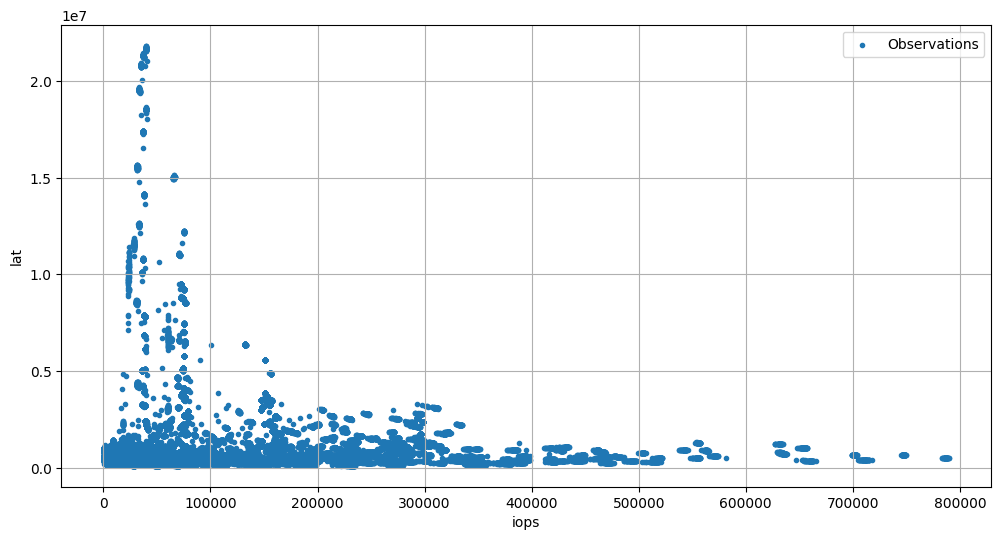

In [42]:
plt.figure(figsize=(12, 6))
plt.scatter(y_tr[:, 0], y_tr[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

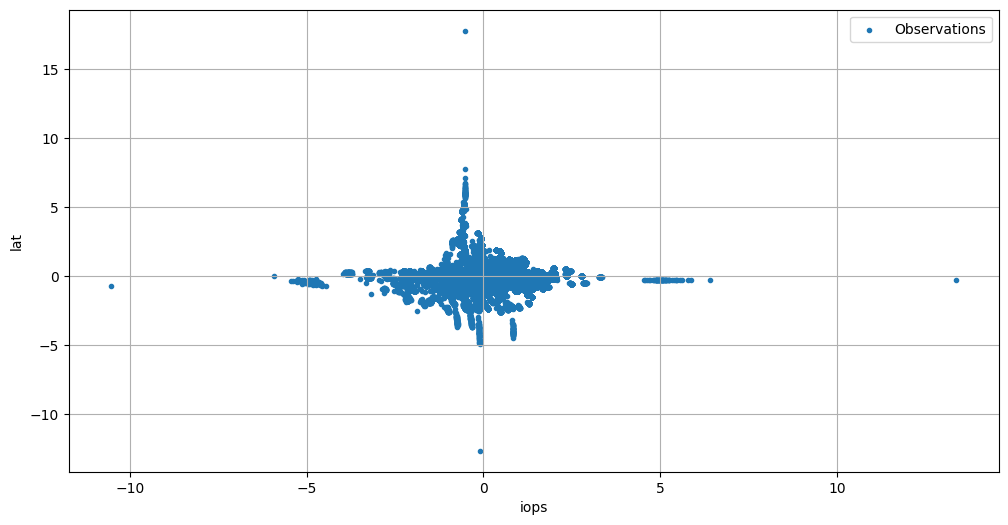

In [43]:
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = torch.tensor(scaler.fit_transform(train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

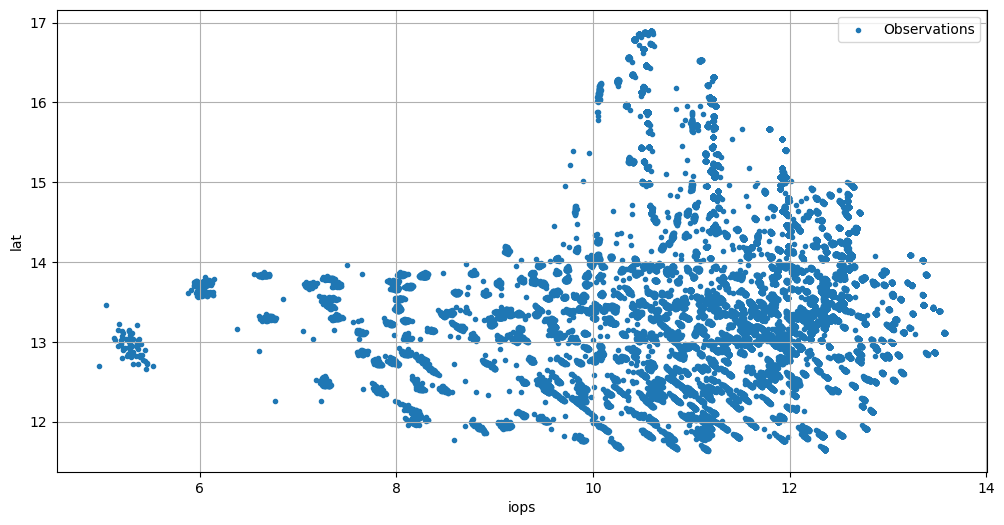

In [44]:
y_tr_ss = torch.tensor(np.log(train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Graphs without outliers

In [45]:
y_tr_w = torch.tensor(new_train[['iops', 'lat']].values)

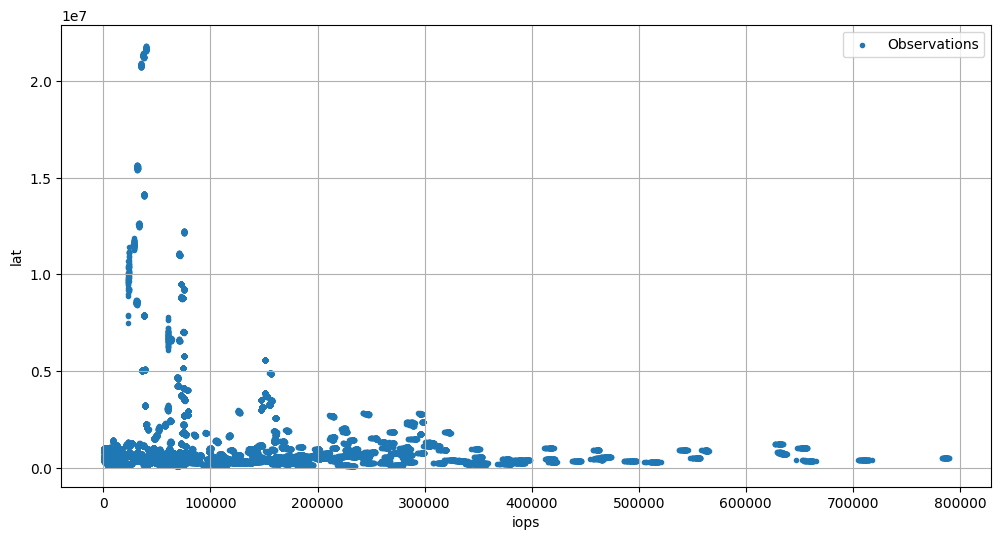

In [46]:
plt.figure(figsize=(12, 6))
plt.scatter(y_tr_w[:, 0], y_tr_w[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

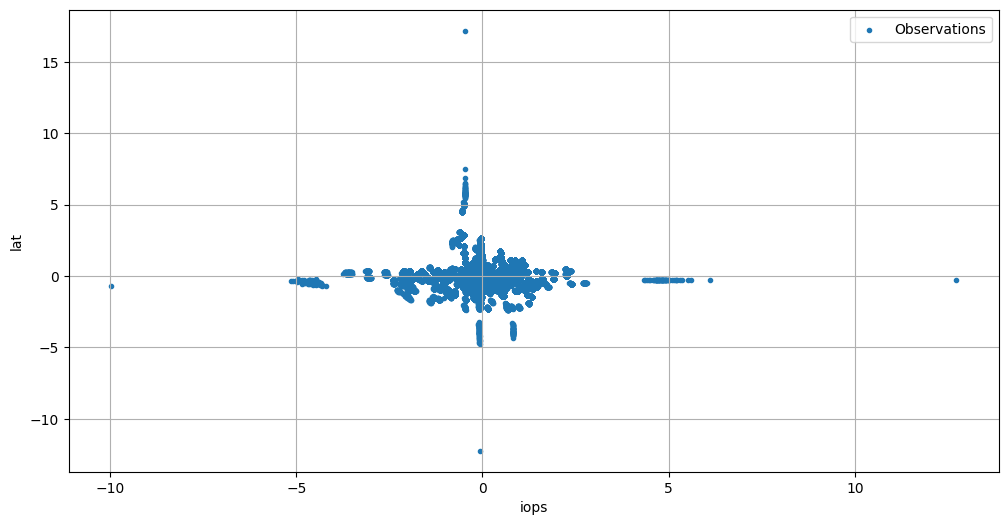

In [47]:
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = torch.tensor(scaler.fit_transform(new_train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

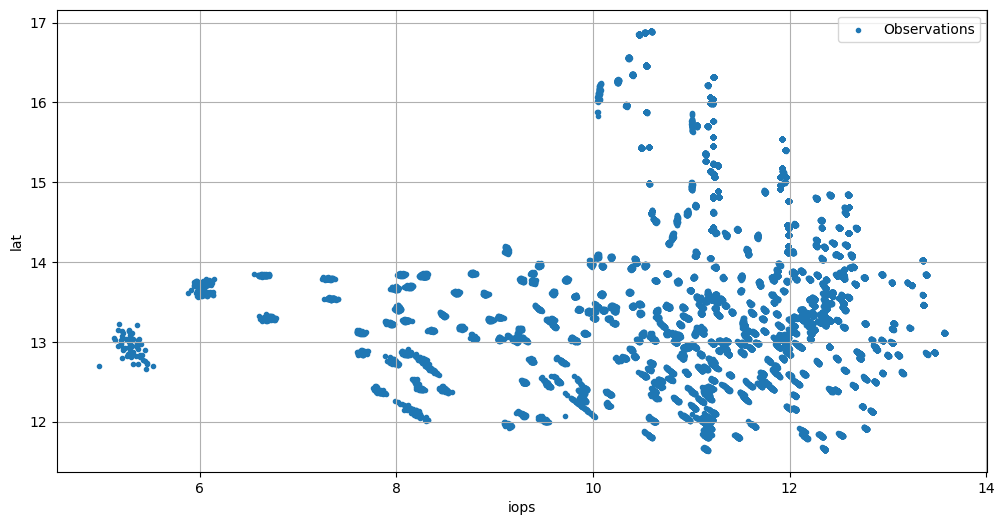

In [48]:
y_tr_ss = torch.tensor(np.log(new_train[['iops', 'lat']].values))

plt.figure(figsize=(12, 6))
plt.scatter(y_tr_ss[:, 0], y_tr_ss[:, 1], marker='.', label='Observations', linewidth=1)
# оси
plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

## Final experiments old

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

In [ ]:
train = train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

model = RealNVP(lr=0.001, n_layers=12, n_epochs=100, batch_size=64, hidden=(100,)) # 200 , hidden=(100,), activation='relu'
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

In [ ]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
ids = ['hse-09132022-234723-z24647-read', 'hse-09132022-155203-z5570-read',
       'hse-09132022-234723-z24647-write', 'hse-09132022-155203-z5570-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

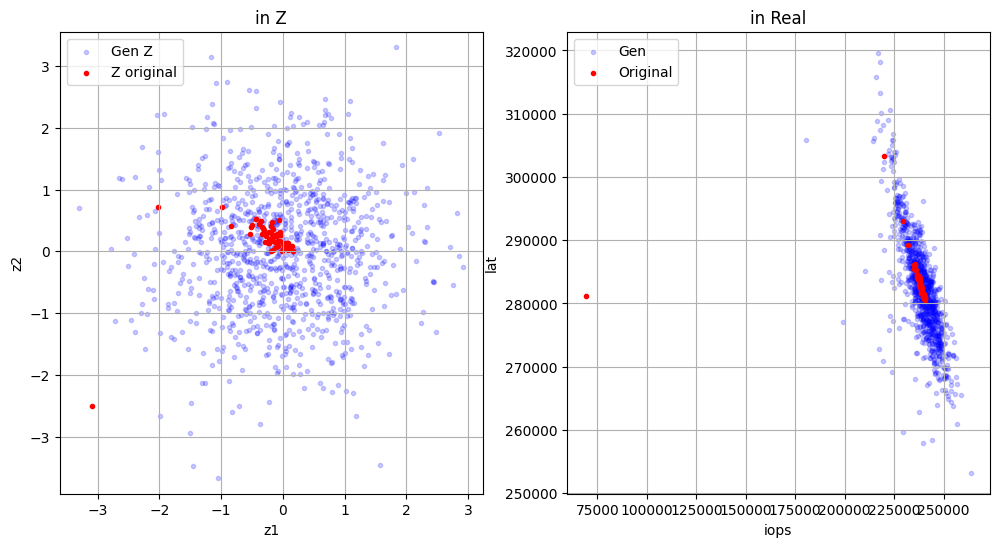

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In Z:
Frechet Distance         = 0.9242 +- 0.3109
Kolmogorov-Smirnov       = 0.4556 +- 0.0149
Cramer-von Mises         = 2.8821 +- 0.2411
Anderson-Darling         = 17.0289 +- 1.4449
ROC AUC                  = 0.5716 +- 0.0153
Kullback-Leibler KDE     = 0.3120 +- 0.0218
Jensen-Shannon KDE       = 0.0893 +- 0.0066
Maximum Mean Discrepancy = 0.1082 +- 0.0105


In [ ]:
# arr1 = np.array([[el] for el in np.array(total_iops[0])])
# arr2 = np.array([[el] for el in np.array(total_lat[0])])
# arr3 = np.array([[el] for el in np.array(gen_iops[0])])
# arr4 = np.array([[el] for el in np.array(gen_lat[0])])

In [ ]:
# print('In Real:')
# calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

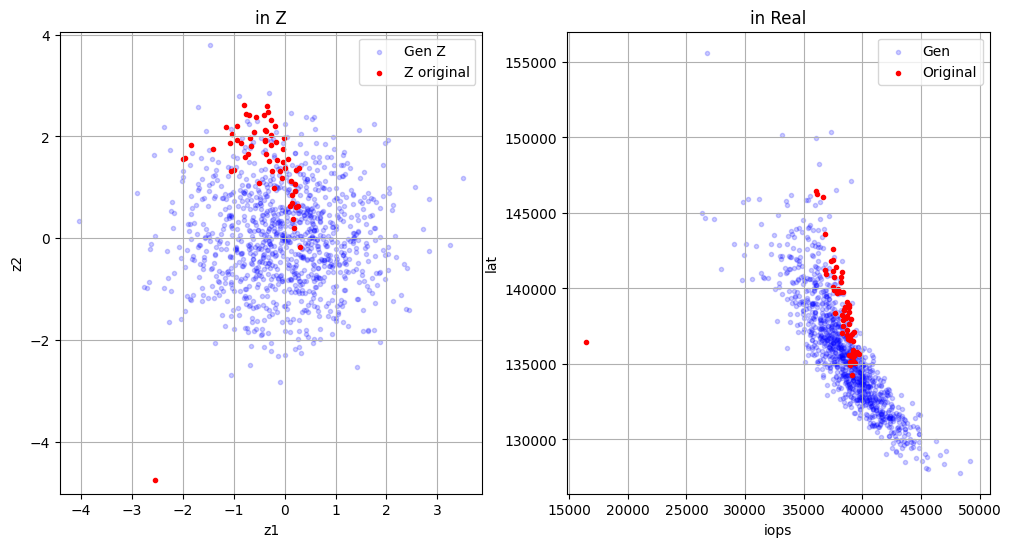

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 2.8358 +- 0.4269
Kolmogorov-Smirnov       = 0.5499 +- 0.0214
Cramer-von Mises         = 6.9072 +- 0.6569
Anderson-Darling         = 53.1386 +- 5.9249
ROC AUC                  = 0.7723 +- 0.0170
Kullback-Leibler KDE     = 0.8227 +- 0.0899
Jensen-Shannon KDE       = 0.1762 +- 0.0156
Maximum Mean Discrepancy = 0.4173 +- 0.0432


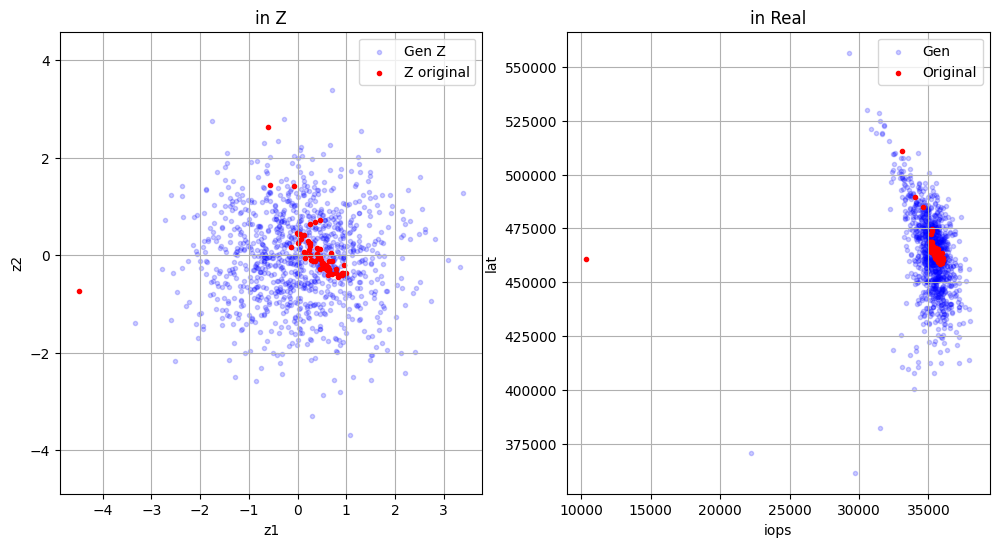

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 0.6803 +- 0.3685
Kolmogorov-Smirnov       = 0.3613 +- 0.0261
Cramer-von Mises         = 2.1004 +- 0.3677
Anderson-Darling         = 12.5674 +- 2.1334
ROC AUC                  = 0.5780 +- 0.0129
Kullback-Leibler KDE     = 0.2886 +- 0.0415
Jensen-Shannon KDE       = 0.0744 +- 0.0091
Maximum Mean Discrepancy = 0.1030 +- 0.0142


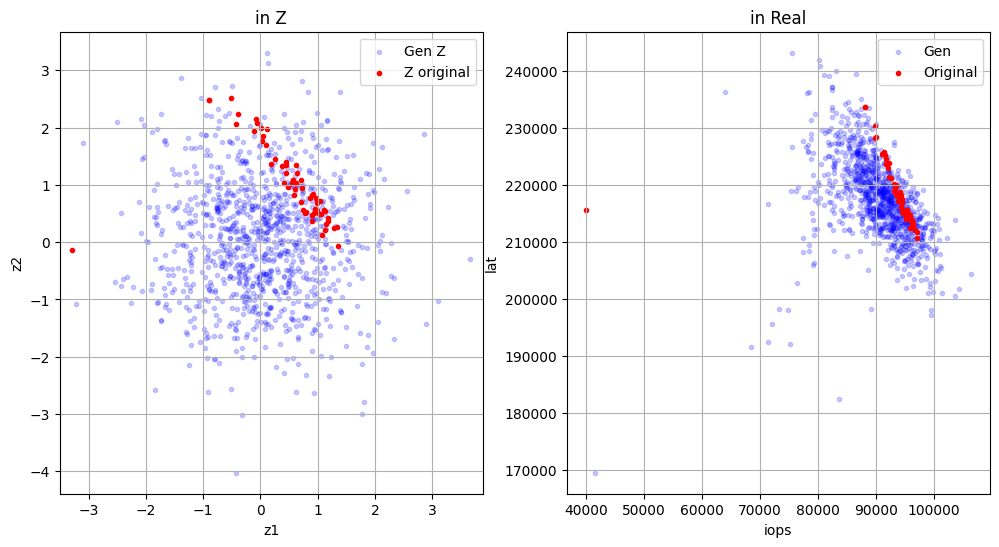

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.6846 +- 0.3710
Kolmogorov-Smirnov       = 0.4613 +- 0.0301
Cramer-von Mises         = 4.5055 +- 0.3911
Anderson-Darling         = 27.8508 +- 2.5241
ROC AUC                  = 0.7392 +- 0.0129
Kullback-Leibler KDE     = 0.4034 +- 0.0286
Jensen-Shannon KDE       = 0.1079 +- 0.0092
Maximum Mean Discrepancy = 0.2477 +- 0.0186


### RESULTS (TEST)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
ids = ['hse-09132022-203942-z36542-read', 'hse-09132022-192053-z87989-read',
       'hse-09132022-203942-z36542-write', 'hse-09132022-192053-z87989-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

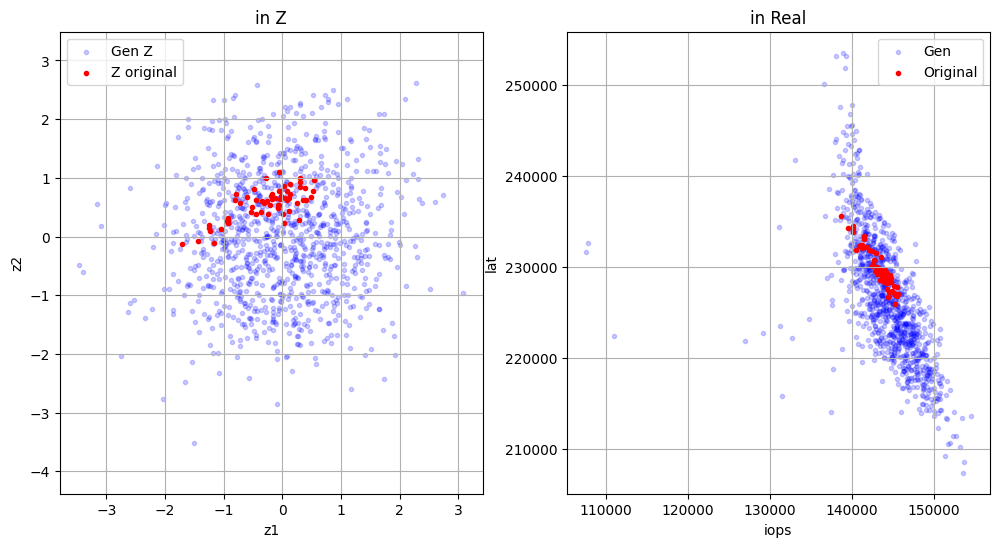

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.2536 +- 0.0810
Kolmogorov-Smirnov       = 0.4029 +- 0.0214
Cramer-von Mises         = 2.9726 +- 0.2515
Anderson-Darling         = 17.0094 +- 1.3766
ROC AUC                  = 0.6390 +- 0.0112
Kullback-Leibler KDE     = 0.3101 +- 0.0252
Jensen-Shannon KDE       = 0.0897 +- 0.0068
Maximum Mean Discrepancy = 0.1391 +- 0.0114


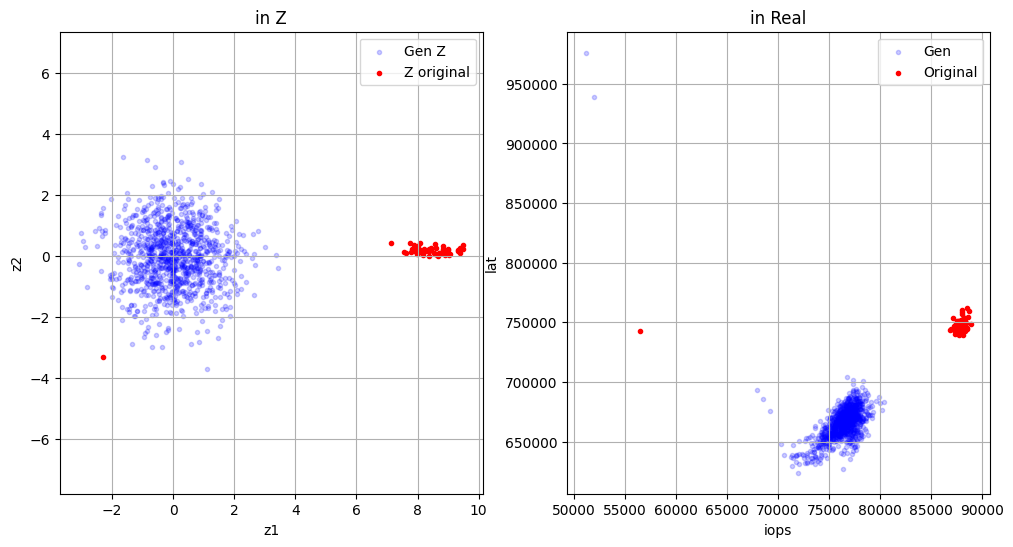

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 69.8398 +- 2.4458
Kolmogorov-Smirnov       = 0.7387 +- 0.0178
Cramer-von Mises         = 10.8517 +- 0.5413
Anderson-Darling         = 106.9382 +- 4.3537
ROC AUC                  = 0.7792 +- 0.0159
Kullback-Leibler KDE     = 6.6591 +- 0.1191
Jensen-Shannon KDE       = 0.3951 +- 0.0084
Maximum Mean Discrepancy = 1.5096 +- 0.0330


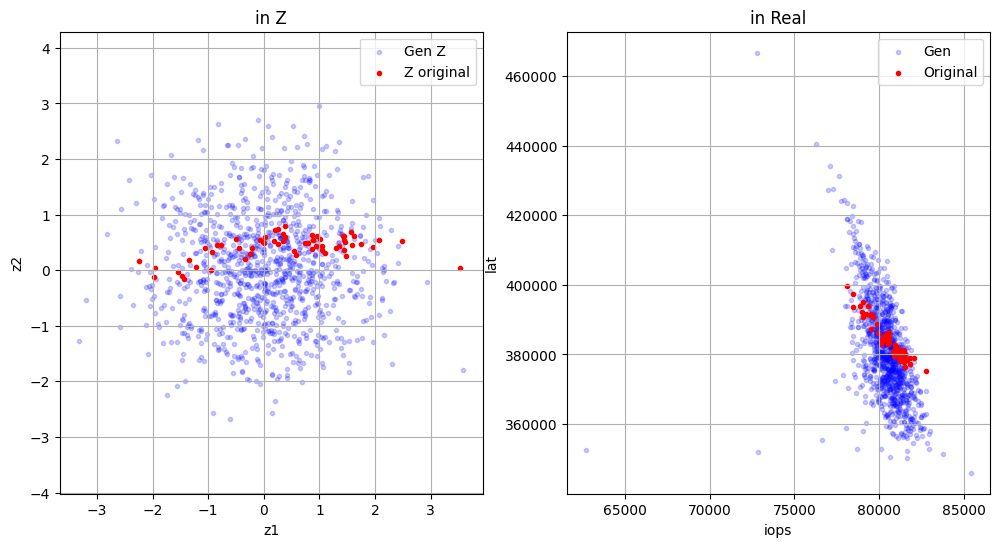

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.0123 +- 0.1627
Kolmogorov-Smirnov       = 0.3699 +- 0.0366
Cramer-von Mises         = 2.6727 +- 0.3868
Anderson-Darling         = 16.6362 +- 2.7892
ROC AUC                  = 0.6333 +- 0.0252
Kullback-Leibler KDE     = 0.2908 +- 0.0356
Jensen-Shannon KDE       = 0.0762 +- 0.0087
Maximum Mean Discrepancy = 0.0880 +- 0.0207


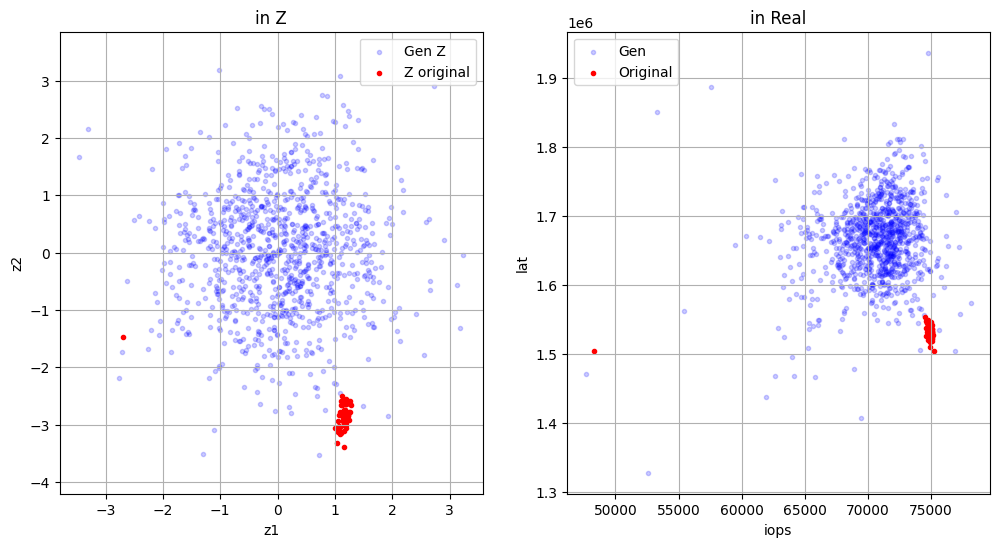

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 10.3203 +- 0.6265
Kolmogorov-Smirnov       = 0.9055 +- 0.0165
Cramer-von Mises         = 15.0893 +- 0.4605
Anderson-Darling         = 132.1911 +- 4.7181
ROC AUC                  = 0.9290 +- 0.0095
Kullback-Leibler KDE     = 2.3045 +- 0.1241
Jensen-Shannon KDE       = 0.4208 +- 0.0127
Maximum Mean Discrepancy = 1.0545 +- 0.0343


## Final experiments without outliers old

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

In [ ]:
train = new_train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

model = RealNVP(lr=0.001, n_layers=6, n_epochs=120, batch_size=64, weight_decay=0.001, hidden=(100,100)) # 200 , activation='relu'

model.fit(y_tr_ss, X_tr_ss) # (target, condition)

(-10.0, 10.0)

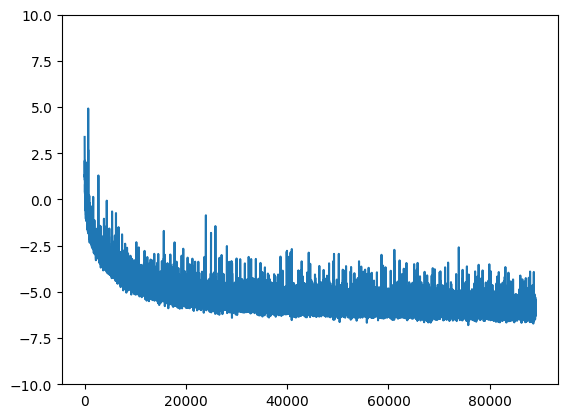

In [ ]:
plt.plot(model.loss_history)
plt.ylim(-10, 10)

In [ ]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
a = torch.tensor(list(train[train['id'] == 'hse-09132022-234723-z24647-read'][['iops', 'lat']].values) * 17)
print(a)

tensor([[237495.0000, 282990.7100],
        [237975.0000, 283126.8900],
        [236411.0000, 284728.6400],
        ...,
        [237162.0000, 283795.3600],
        [238777.0000, 281577.5700],
        [239088.0000, 281640.3200]], dtype=torch.float64)


In [ ]:
ids = ['hse-09132022-234723-z24647-read', 'hse-09132022-155203-z5570-read',
       'hse-09132022-234723-z24647-write', 'hse-09132022-155203-z5570-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

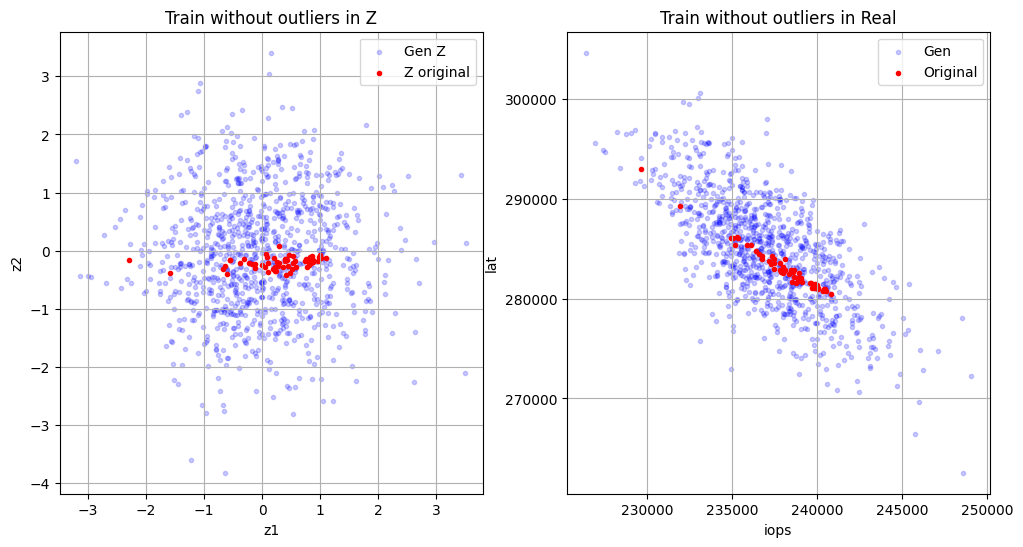

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In Z:
Frechet Distance         = 1.1714 +- 0.1501
Kolmogorov-Smirnov       = 0.3963 +- 0.0256
Cramer-von Mises         = 2.7986 +- 0.3053
Anderson-Darling         = 16.3504 +- 1.9815
ROC AUC                  = 0.5869 +- 0.0157
Kullback-Leibler KDE     = 0.2996 +- 0.0273
Jensen-Shannon KDE       = 0.0859 +- 0.0080
Maximum Mean Discrepancy = 0.1069 +- 0.0160


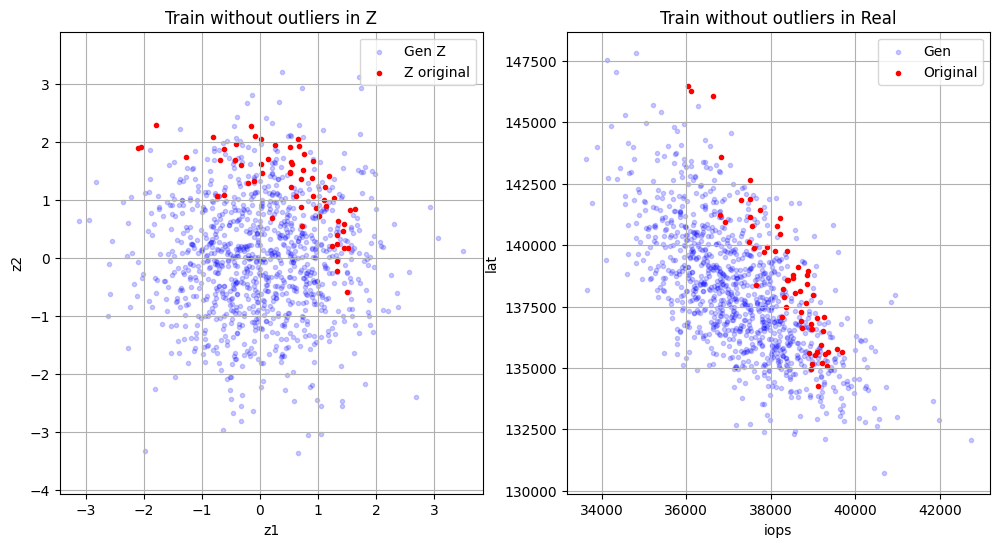

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 2.1434 +- 0.1981
Kolmogorov-Smirnov       = 0.4572 +- 0.0333
Cramer-von Mises         = 5.1657 +- 0.4896
Anderson-Darling         = 35.6952 +- 4.0790
ROC AUC                  = 0.7500 +- 0.0161
Kullback-Leibler KDE     = 0.4852 +- 0.0490
Jensen-Shannon KDE       = 0.1155 +- 0.0099
Maximum Mean Discrepancy = 0.2850 +- 0.0266


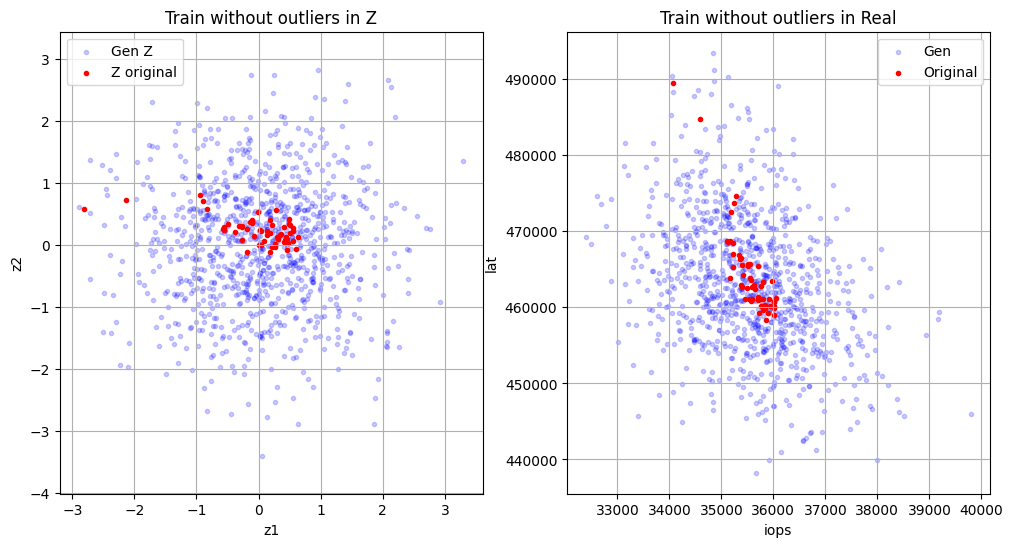

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 0.9278 +- 0.1084
Kolmogorov-Smirnov       = 0.3705 +- 0.0114
Cramer-von Mises         = 1.9804 +- 0.2044
Anderson-Darling         = 12.1260 +- 1.2000
ROC AUC                  = 0.5474 +- 0.0118
Kullback-Leibler KDE     = 0.2490 +- 0.0205
Jensen-Shannon KDE       = 0.0711 +- 0.0053
Maximum Mean Discrepancy = 0.0851 +- 0.0103


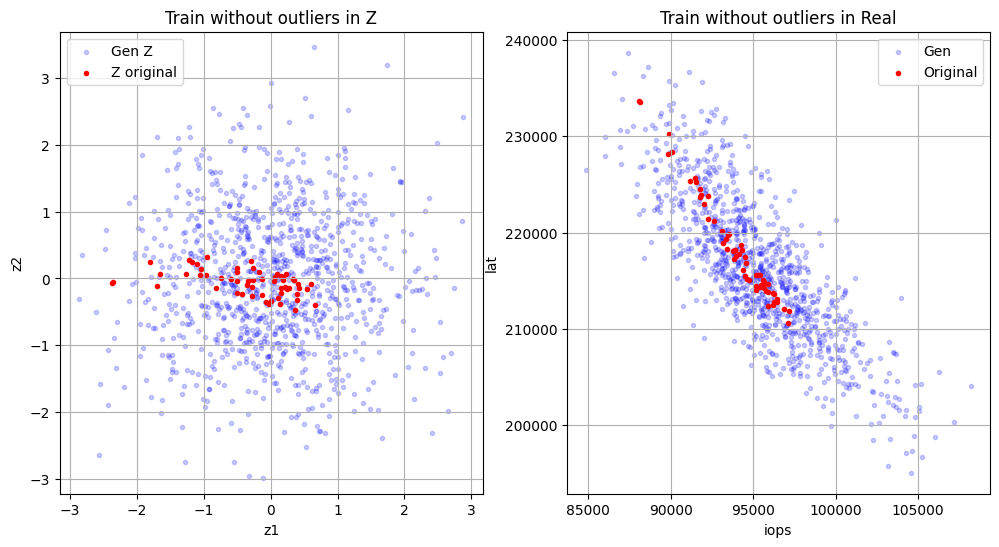

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 0.9772 +- 0.0833
Kolmogorov-Smirnov       = 0.3396 +- 0.0182
Cramer-von Mises         = 1.9584 +- 0.1510
Anderson-Darling         = 12.3128 +- 1.0752
ROC AUC                  = 0.5558 +- 0.0119
Kullback-Leibler KDE     = 0.2544 +- 0.0174
Jensen-Shannon KDE       = 0.0726 +- 0.0055
Maximum Mean Discrepancy = 0.0770 +- 0.0082


### RESULTS (TEST)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
test = new_test

In [ ]:
ids = ['hse-09132022-203942-z36542-read', 'hse-09132022-192053-z87989-read',
       'hse-09132022-203942-z36542-write', 'hse-09132022-192053-z87989-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

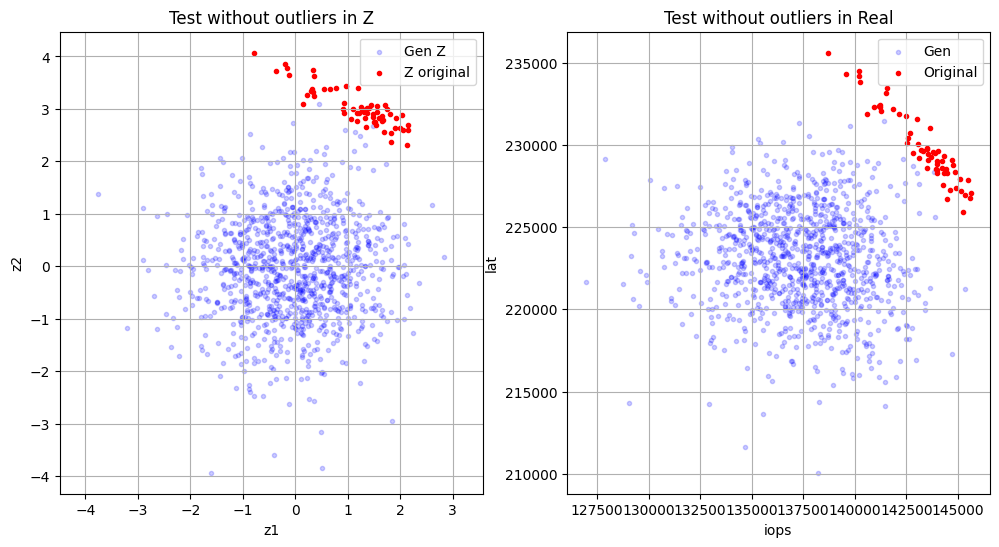

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 11.6936 +- 0.2691
Kolmogorov-Smirnov       = 0.7892 +- 0.0285
Cramer-von Mises         = 13.6339 +- 0.6021
Anderson-Darling         = 130.2344 +- 4.8437
ROC AUC                  = 0.9215 +- 0.0107
Kullback-Leibler KDE     = 2.9802 +- 0.3077
Jensen-Shannon KDE       = 0.4018 +- 0.0131
Maximum Mean Discrepancy = 1.0917 +- 0.0229


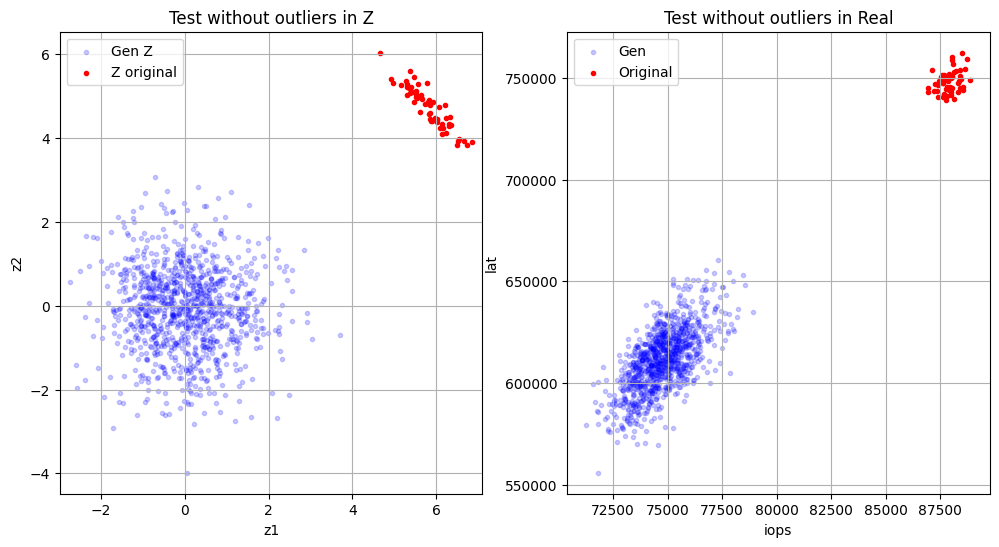

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 57.8562 +- 0.5378
Kolmogorov-Smirnov       = 1.0000 +- 0.0000
Cramer-von Mises         = 18.5796 +- 0.0004
Anderson-Darling         = 197.5728 +- 0.0709
ROC AUC                  = 1.0000 +- 0.0000
Kullback-Leibler KDE     = 12.5169 +- 0.1302
Jensen-Shannon KDE       = 0.6898 +- 0.0008
Maximum Mean Discrepancy = 1.4977 +- 0.0153


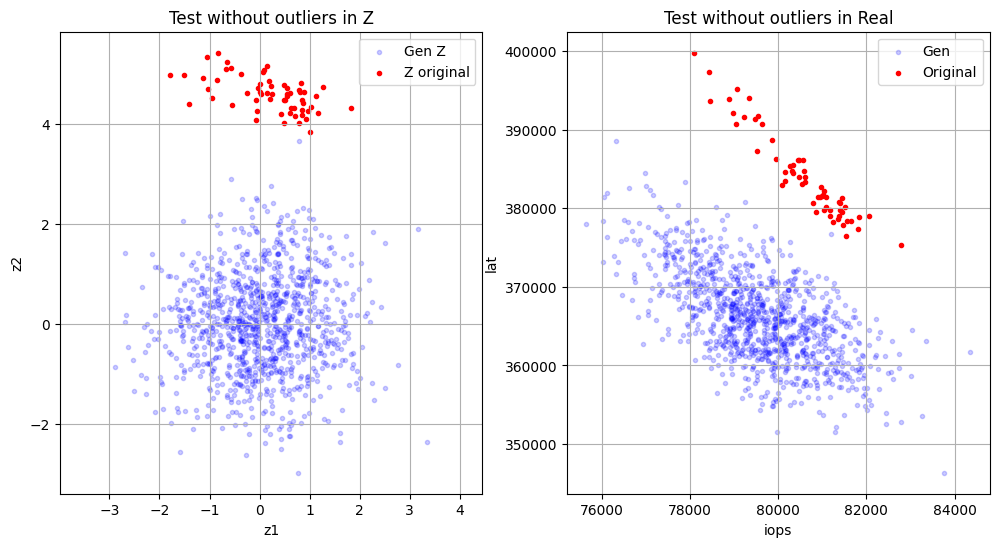

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 21.5210 +- 0.4880
Kolmogorov-Smirnov       = 0.6184 +- 0.0287
Cramer-von Mises         = 9.8246 +- 0.2326
Anderson-Darling         = 102.0288 +- 1.2767
ROC AUC                  = 0.7841 +- 0.0170
Kullback-Leibler KDE     = 5.5400 +- 0.6418
Jensen-Shannon KDE       = 0.3510 +- 0.0032
Maximum Mean Discrepancy = 1.3268 +- 0.0211


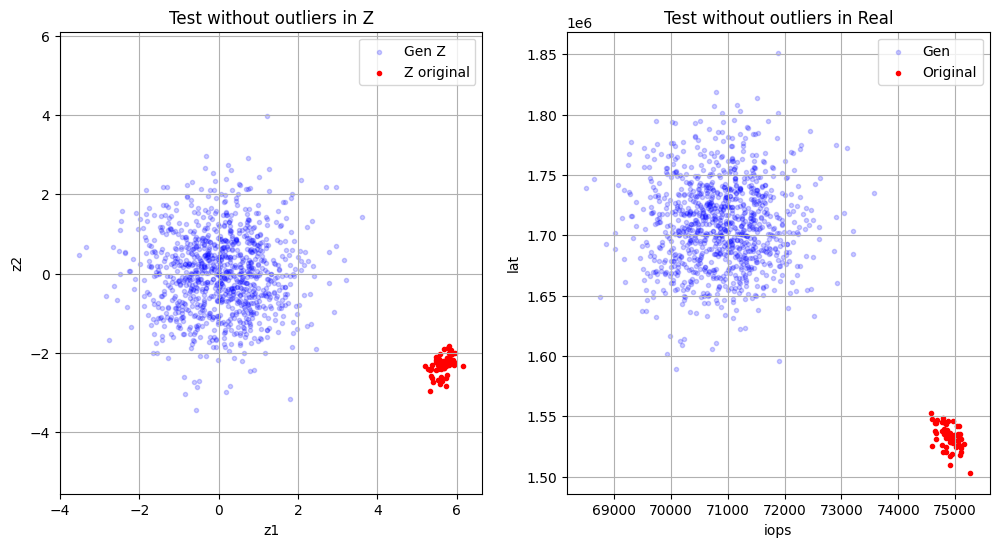

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 38.1764 +- 0.4702
Kolmogorov-Smirnov       = 0.9876 +- 0.0025
Cramer-von Mises         = 18.1798 +- 0.0998
Anderson-Darling         = 183.4345 +- 2.6906
ROC AUC                  = 0.9940 +- 0.0015
Kullback-Leibler KDE     = 8.1034 +- 0.0850
Jensen-Shannon KDE       = 0.6080 +- 0.0050
Maximum Mean Discrepancy = 1.5675 +- 0.0051


'hse-09132022-180712-z63065-read'

посмотреть метрики, сравнить пред обучение и это. relu: lr поменьше!

## Final experiments without outliers 1

- RealNVP(lr=0.01, n_layers=16, n_epochs=80, batch_size=200, hidden=10, activation='tanh')
- RealNVP(lr=0.001, n_layers=16, n_epochs=80, batch_size=200, hidden=100, activation='tanh')
- RealNVP(lr=0.01, n_layers=16, n_epochs=80, batch_size=200, hidden=10, activation='relu')
- RealNVP(lr=0.001, n_layers=16, n_epochs=80, batch_size=200, hidden=100, activation='relu')

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

https://github.com/pytorch/pytorch/issues/15131

https://github.com/pytorch/pytorch/issues/59228

lr = 0.0001 падает

0.00001 что-то не так с лоссом



In [50]:
train = new_train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

# model = RealNVP(lr=0.00001, n_layers=6, n_epochs=80, batch_size=64, weight_decay=0.001, hidden=(100,100), activation='relu') # 200 , activation='relu'
model = RealNVP(lr=0.01, n_layers=16, n_epochs=80, batch_size=200, hidden=(10,), activation='tanh')
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

(-10.0, 10.0)

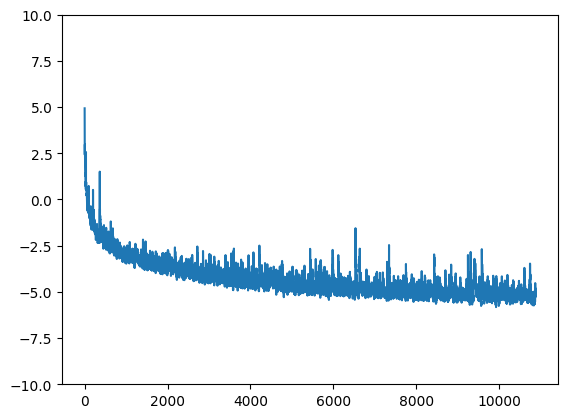

In [51]:
plt.plot(model.loss_history)
plt.ylim(-10, 10)

In [52]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [53]:
pd.unique(new_train[['id']]. values.ravel())

array(['hse-09142022-013313-z3769-read',
       'hse-09132022-220621-z47654-read',
       'hse-09132022-220621-z47654-write',
       'hse-09132022-145656-z44664-read',
       'hse-09132022-145656-z44664-write',
       'hse-09132022-114106-z26207-read',
       'hse-09132022-114106-z26207-write',
       'hse-09132022-193036-z66798-read',
       'hse-09132022-193036-z66798-write',
       'hse-09132022-144055-z72468-read',
       'hse-09132022-144055-z72468-write',
       'hse-09132022-204254-z78794-read',
       'hse-09132022-204254-z78794-write',
       'hse-09132022-225919-z97534-read',
       'hse-09132022-225919-z97534-write',
       'hse-09132022-231343-z49201-read',
       'hse-09132022-231343-z49201-write',
       'hse-09142022-005311-z97289-read',
       'hse-09142022-005311-z97289-write',
       'hse-09132022-181650-z73563-read',
       'hse-09132022-181650-z73563-write',
       'hse-09132022-183252-z8604-read',
       'hse-09132022-183252-z8604-write',
       'hse-09132022-23120

In [54]:
from torch.utils.data import TensorDataset, DataLoader

In [55]:
a = torch.tensor(list(train[train['id'] == 'hse-09132022-183252-z8604-read'][['iops', 'lat']].values) * 17)
print(a)

tensor([[  32372.0000, 1127303.8100],
        [  32484.0000, 1131804.9800],
        [  32750.0000, 1140352.2800],
        ...,
        [  32434.0000, 1110021.2300],
        [  32651.0000, 1102607.7300],
        [  32626.0000, 1109122.6700]], dtype=torch.float64)


In [56]:
ids = ['hse-09132022-220621-z47654-read', 'hse-09132022-183252-z8604-read',
       'hse-09132022-220621-z47654-write', 'hse-09132022-183252-z8604-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

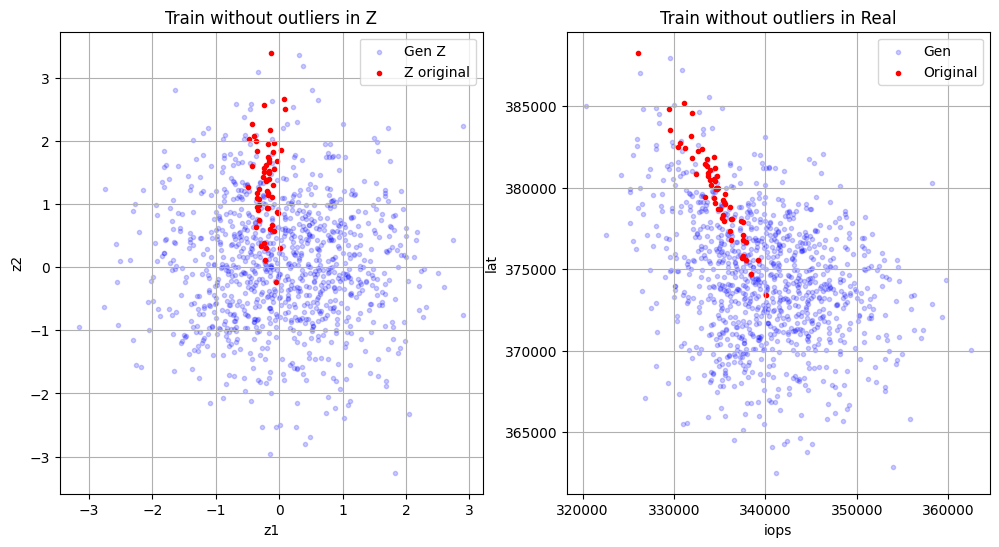

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [58]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [59]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In Z:
Frechet Distance         = 2.6785 +- 0.2353
Kolmogorov-Smirnov       = 0.5563 +- 0.0254
Cramer-von Mises         = 6.3828 +- 0.5124
Anderson-Darling         = 43.2442 +- 4.2477
ROC AUC                  = 0.7220 +- 0.0128
Kullback-Leibler KDE     = 0.6390 +- 0.0564
Jensen-Shannon KDE       = 0.1653 +- 0.0112
Maximum Mean Discrepancy = 0.3257 +- 0.0356


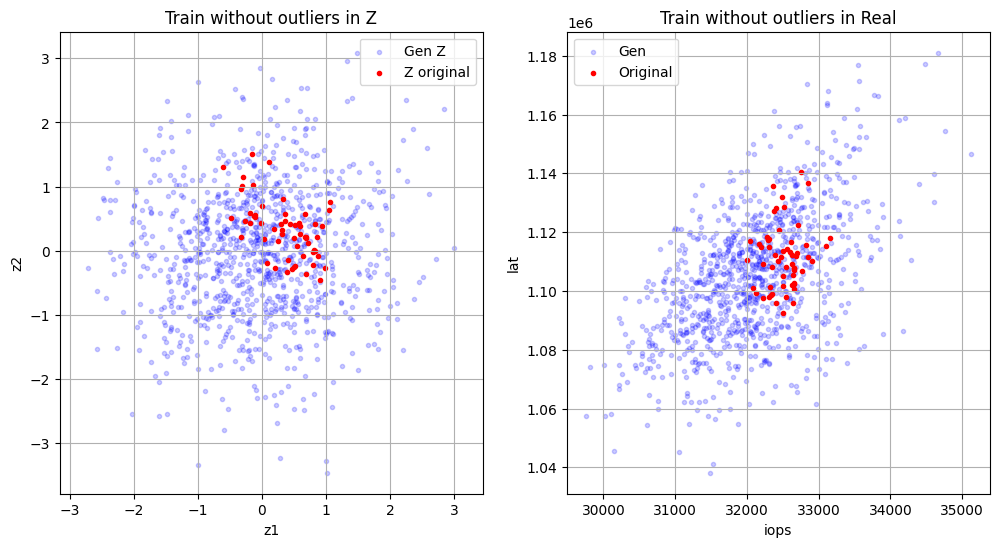

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [61]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [62]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.0658 +- 0.0862
Kolmogorov-Smirnov       = 0.3607 +- 0.0224
Cramer-von Mises         = 2.2708 +- 0.3201
Anderson-Darling         = 13.3156 +- 1.8160
ROC AUC                  = 0.6393 +- 0.0128
Kullback-Leibler KDE     = 0.2505 +- 0.0239
Jensen-Shannon KDE       = 0.0706 +- 0.0064
Maximum Mean Discrepancy = 0.1246 +- 0.0113


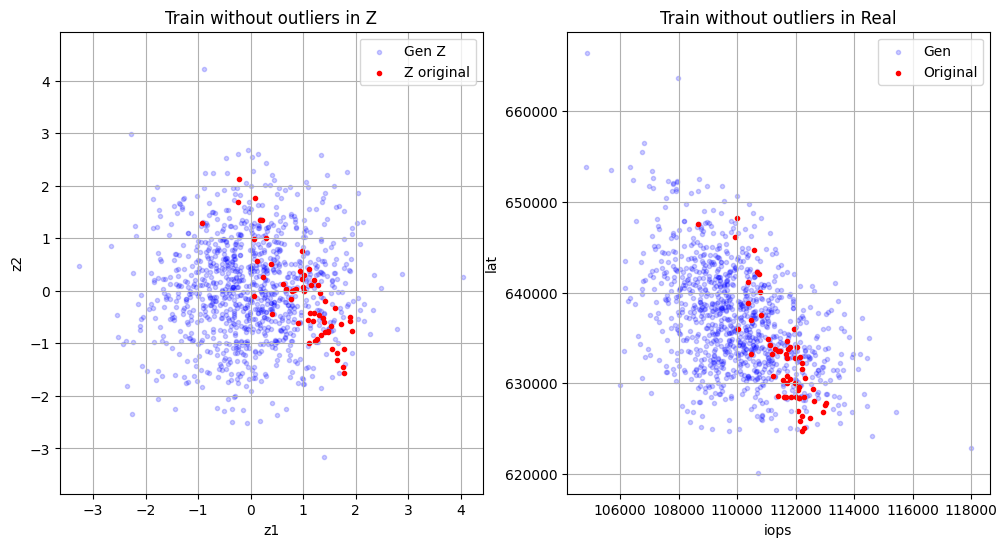

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [64]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [65]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1.6289 +- 0.2012
Kolmogorov-Smirnov       = 0.3759 +- 0.0473
Cramer-von Mises         = 3.8417 +- 0.7854
Anderson-Darling         = 23.6948 +- 4.6284
ROC AUC                  = 0.6872 +- 0.0282
Kullback-Leibler KDE     = 0.3379 +- 0.0620
Jensen-Shannon KDE       = 0.0835 +- 0.0147
Maximum Mean Discrepancy = 0.2246 +- 0.0357


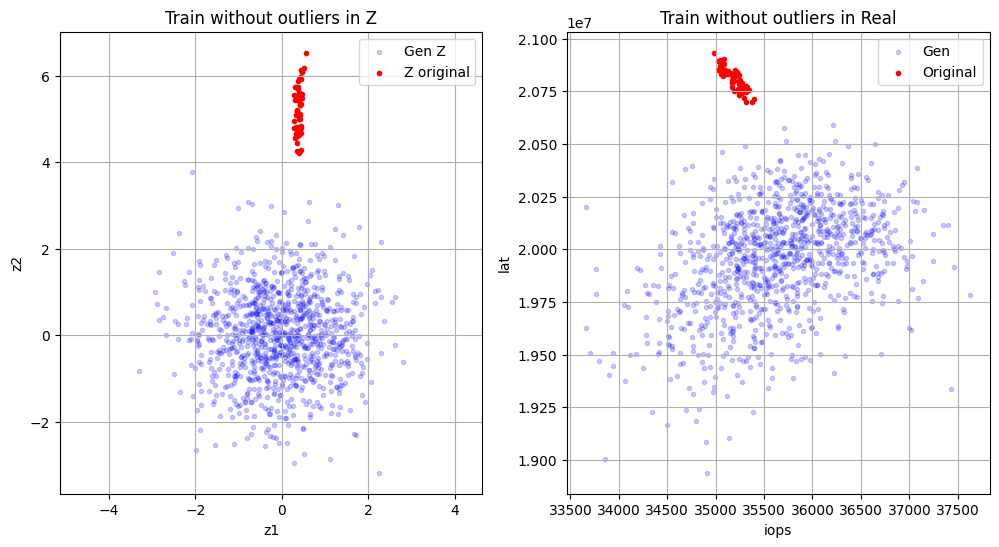

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [67]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [68]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 28.4592 +- 0.7621
Kolmogorov-Smirnov       = 0.8145 +- 0.0072
Cramer-von Mises         = 12.1083 +- 0.1592
Anderson-Darling         = 115.0155 +- 0.8685
ROC AUC                  = 0.8354 +- 0.0078
Kullback-Leibler KDE     = 6.2477 +- 0.2532
Jensen-Shannon KDE       = 0.4155 +- 0.0034
Maximum Mean Discrepancy = 1.4598 +- 0.0119


### RESULTS (VAL)

In [69]:
from torch.utils.data import TensorDataset, DataLoader

In [70]:
pd.unique(val[['id']]. values.ravel())

array(['hse-09132022-143120-z31269-read',
       'hse-09132022-143120-z31269-write',
       'hse-09132022-161303-z88497-read',
       'hse-09132022-161303-z88497-write',
       'hse-09132022-155340-z5879-read',
       'hse-09132022-155340-z5879-write',
       'hse-09132022-165443-z99348-read',
       'hse-09132022-165443-z99348-write',
       'hse-09132022-180849-z74771-read',
       'hse-09132022-180849-z74771-write',
       'hse-09132022-211502-z50964-read',
       'hse-09132022-211502-z50964-write',
       'hse-09142022-011049-z43035-read',
       'hse-09142022-011049-z43035-write',
       'hse-09142022-001439-z75543-read',
       'hse-09142022-001439-z75543-write',
       'hse-09132022-210347-z54822-read',
       'hse-09132022-210347-z54822-write',
       'hse-09142022-010111-z98172-read',
       'hse-09142022-010111-z98172-write',
       'hse-09142022-011401-z35494-read',
       'hse-09142022-011401-z35494-write',
       'hse-09132022-235524-z69201-read',
       'hse-09132022-2355

In [71]:
ids = ['hse-09132022-110545-z2206-read', 'hse-09132022-152126-z31190-read',
       'hse-09132022-110545-z2206-write', 'hse-09132022-152126-z31190-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_val = torch.tensor(val[val['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_val[:, 0])
    total_lat.append(y_val[:, 1])
    X_val = torch.tensor(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_val_ss = scaler.transform(y_val)
    X_val_ss = stscaler.transform(X_val)
    y_tst = torch.tensor(y_val_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_val_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

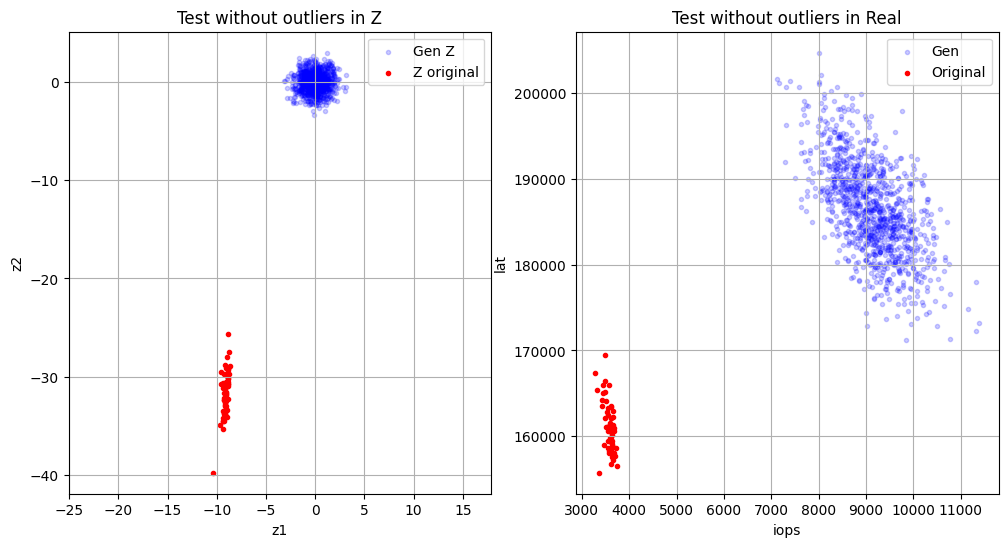

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [73]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [74]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 1093.5765 +- 19.3609
Kolmogorov-Smirnov       = 1.0000 +- 0.0000
Cramer-von Mises         = 18.5796 +- 0.0004
Anderson-Darling         = 197.5702 +- 0.0786
ROC AUC                  = 1.0000 +- 0.0000
Kullback-Leibler KDE     = 13.3213 +- 0.0656
Jensen-Shannon KDE       = 0.6931 +- 0.0000
Maximum Mean Discrepancy = 1.1339 +- 0.0394


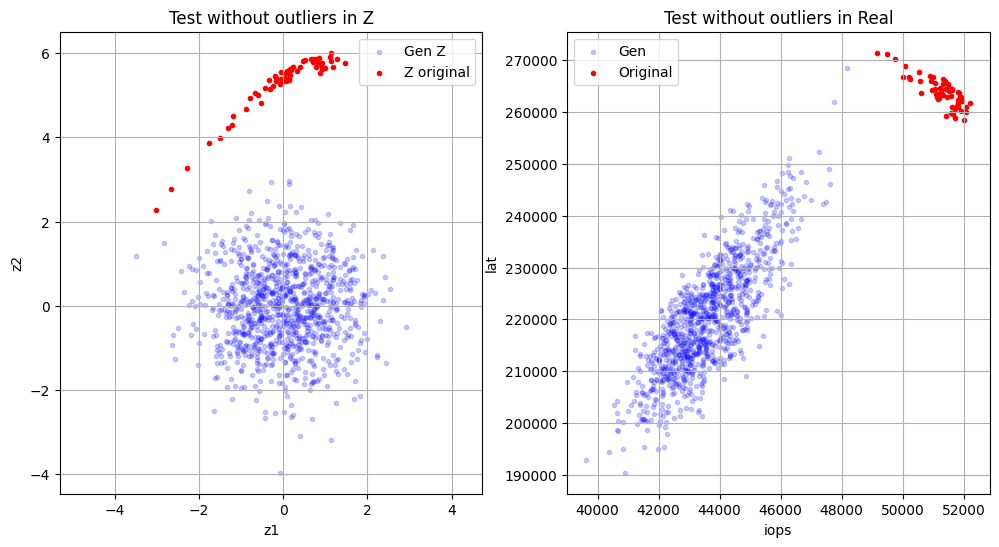

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [76]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [77]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 28.6583 +- 0.9670
Kolmogorov-Smirnov       = 0.5836 +- 0.0225
Cramer-von Mises         = 9.4894 +- 0.1265
Anderson-Darling         = 99.4907 +- 0.6945
ROC AUC                  = 0.7665 +- 0.0126
Kullback-Leibler KDE     = 6.1731 +- 0.1736
Jensen-Shannon KDE       = 0.3422 +- 0.0054
Maximum Mean Discrepancy = 1.3264 +- 0.0491


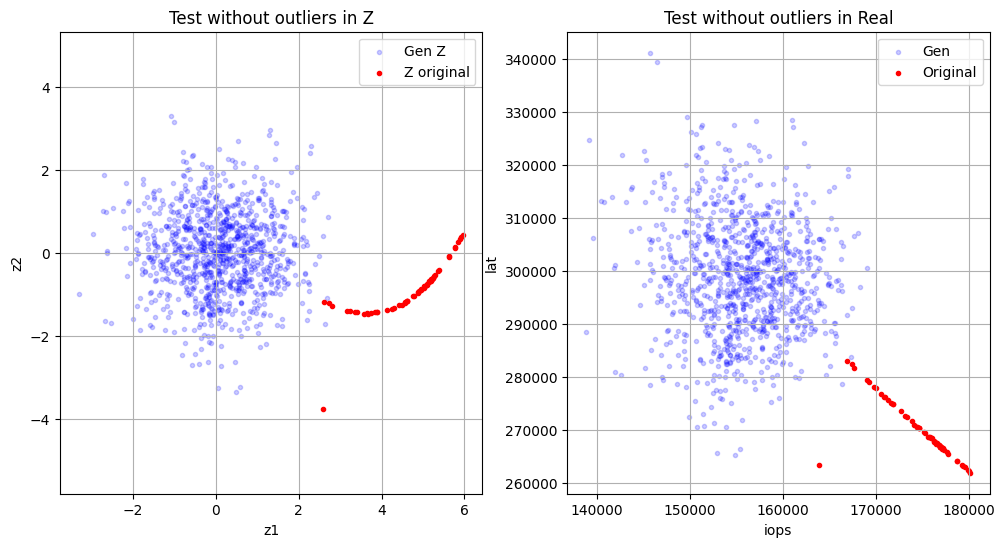

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [79]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [80]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 22.3066 +- 1.0344
Kolmogorov-Smirnov       = 0.7815 +- 0.0221
Cramer-von Mises         = 12.4517 +- 0.4817
Anderson-Darling         = 118.1739 +- 3.1708
ROC AUC                  = 0.8959 +- 0.0116
Kullback-Leibler KDE     = 5.8399 +- 0.2008
Jensen-Shannon KDE       = 0.3979 +- 0.0105
Maximum Mean Discrepancy = 1.2462 +- 0.0434


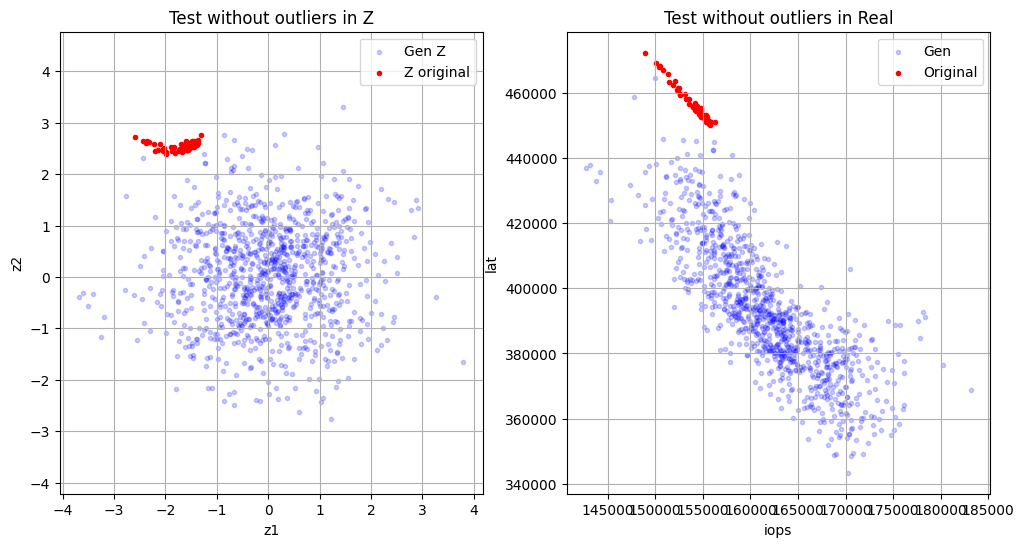

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [82]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [83]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 10.6934 +- 0.2560
Kolmogorov-Smirnov       = 0.9426 +- 0.0051
Cramer-von Mises         = 16.2214 +- 0.2060
Anderson-Darling         = 145.8361 +- 3.8737
ROC AUC                  = 0.9681 +- 0.0036
Kullback-Leibler KDE     = 2.5241 +- 0.0836
Jensen-Shannon KDE       = 0.4775 +- 0.0070
Maximum Mean Discrepancy = 1.0807 +- 0.0235


In [84]:
ids = pd.unique(val[['id']]. values.ravel())
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []
d = []
total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_val = torch.tensor(val[val['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_val[:, 0])
    total_lat.append(y_val[:, 1])
    X_val = torch.tensor(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_val_ss = scaler.transform(y_val)
    X_val_ss = stscaler.transform(X_val)
    y_tst = torch.tensor(y_val_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_val_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    # results_iops = []
    # results_lat = []
    iopsd = []
    latd = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        ztotal_iops.append(y_data[0][0])
        ztotal_lat.append(y_data[0][1])
        iopsd.append(y_data[0][0])
        latd.append(y_data[0][1])
    d.append((np.mean(iopsd) ** 2 + np.mean(latd) ** 2) ** 0.5)
    X_bigger = torch.tensor(list(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    # genresults_iops = []
    # genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        zgen_iops.append(y_data[0][0])
        zgen_lat.append(y_data[0][1])

    # ztotal_iops.append(results_iops)
    # ztotal_lat.append(results_lat)
    # zgen_iops.append(genresults_iops)
    # zgen_lat.append(genresults_lat)

In [85]:
len(zgen_lat)


347412

(-10.0, 10.0, -10.0, 10.0)

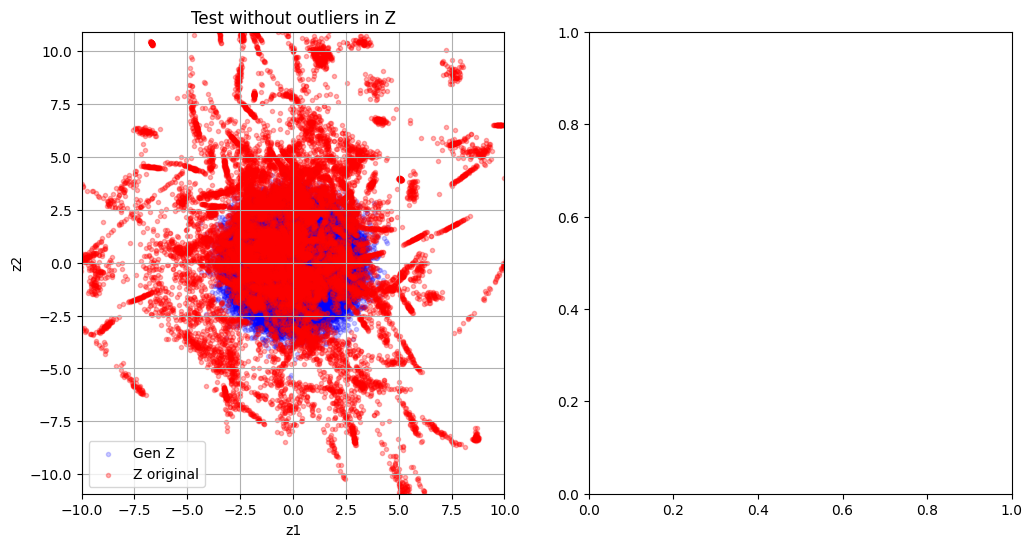

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops, zgen_lat, marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops, ztotal_lat, marker='.', label='Z original', color='red', linewidth=1, alpha=0.3)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()
ax1.axis(xmin=-10,xmax=10, ymin=-10,ymax=10)

# ax2.scatter(gen_iops, gen_lat, marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
# ax2.scatter(total_iops, total_lat, marker='.', label='Original', color='red', linewidth=1)
# ax2.set_title("Test without outliers in Real")
# # ax2.axis('equal')
# ax2.set(xlabel='iops', ylabel='lat')
# ax2.grid()
# ax2.legend()

In [87]:
# тут могла бы быть регрессия для d в зависимости от x

In [88]:
new_d = np.array(d)

In [89]:
sigmad = np.mean(new_d**2)
print(sigmad)

69.88376949098175


In [90]:
print(sigmad)

69.88376949098175


### RESULTS (TEST)

In [91]:
print(sigmad)

69.88376949098175


In [92]:
sigmad = 0

In [93]:
test = new_test

In [94]:
print(pd.unique(test[['id']].values.ravel()))

['hse-09132022-180712-z63065-read' 'hse-09132022-180712-z63065-write'
 'hse-09132022-212616-z36709-read' 'hse-09132022-212616-z36709-write'
 'hse-09132022-203942-z36542-read' 'hse-09132022-203942-z36542-write'
 'hse-09132022-113615-z47578-read' 'hse-09132022-113615-z47578-write'
 'hse-09132022-113127-z92275-read' 'hse-09132022-113127-z92275-write'
 'hse-09132022-202959-z97080-read' 'hse-09132022-202959-z97080-write'
 'hse-09132022-130756-z72964-read' 'hse-09132022-130756-z72964-write'
 'hse-09132022-152621-z23474-read' 'hse-09132022-152621-z23474-write'
 'hse-09132022-222402-z67880-read' 'hse-09132022-222402-z67880-write'
 'hse-09142022-002727-z41754-read' 'hse-09142022-002727-z41754-write'
 'hse-09132022-215503-z42747-read' 'hse-09132022-215503-z42747-write'
 'hse-09132022-154850-z69269-read' 'hse-09132022-154850-z69269-write'
 'hse-09132022-162550-z13863-read' 'hse-09132022-162550-z13863-write'
 'hse-09132022-131738-z64548-read' 'hse-09132022-131738-z64548-write'
 'hse-09132022-16335

In [95]:
ids = ['hse-09132022-212616-z36709-read', 'hse-09132022-212616-z36709-write',
       'hse-09132022-172841-z37264-write', 'hse-09132022-223341-z77063-read']
# ids = pd.unique(test[['id']]. values.ravel())
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    # y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    # y_gen = torch.tensor(y_gen, dtype=torch.float32)
    y_len = len(model.sample(stscaler.transform(X_bigger.clone().detach())))
    genresults_iops = []
    genresults_lat = []
    for i in range(10):
        d = np.random.normal(0, sigmad, 1)
        y_gen = np.random.normal(d, 1, (y_len, 2))

        y_gen = torch.tensor(y_gen, dtype=torch.float32)
        # gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
        # gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
        dataset = TensorDataset(y_gen, X_bigger_tst)

        for i, data in enumerate(DataLoader(dataset)):
            y_data= data[0]
            X_data = data[1]
            for lay in model.nf.layers:
                y_data = lay.g(y_data, X_data)
            y_data = scaler.inverse_transform(y_data.detach())
            genresults_iops.append(y_data[0][0])
            genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

In [96]:
zgen_iops

[[31763.17026901821,
  31418.118780099117,
  30319.128603630077,
  30312.71152675233,
  27907.360090615002,
  25175.423978189952,
  28489.46760789892,
  27299.63151714769,
  31007.675963073387,
  28543.707147830282,
  31315.03221759293,
  30954.563094763864,
  26848.028163086226,
  23008.21296059792,
  31461.750141414686,
  29462.986147834963,
  27435.501401789465,
  31639.570897872843,
  28795.01050255333,
  31266.20151471045,
  27456.67674858593,
  28560.266840335775,
  30319.214506035343,
  29309.13106014444,
  27721.17640558503,
  28267.318014152897,
  28279.722197271134,
  26051.549884969958,
  31076.315978626797,
  25948.46208353928,
  28878.10284511235,
  30045.116321813755,
  30209.252633945463,
  27678.51486621995,
  31374.307994371356,
  28268.03533955472,
  28882.140065456893,
  27468.688348173142,
  31356.99995995599,
  30046.76998045268,
  31142.497601337793,
  29370.664082734114,
  25496.872417576626,
  31117.75948845333,
  26636.599015827724,
  22573.670775136816,
  1978

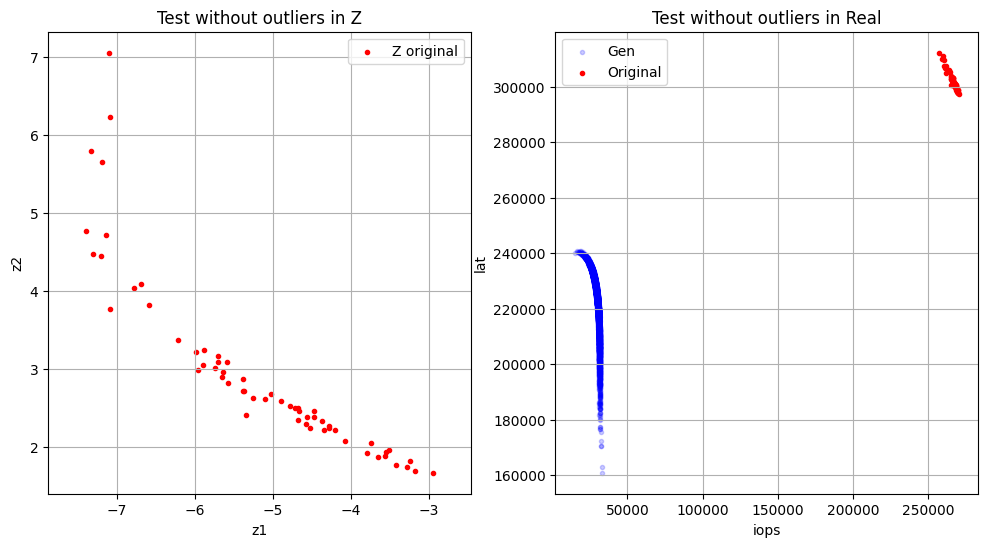

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [98]:
# arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
# arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
# arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
# arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [99]:
# print('In Z:')
# calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

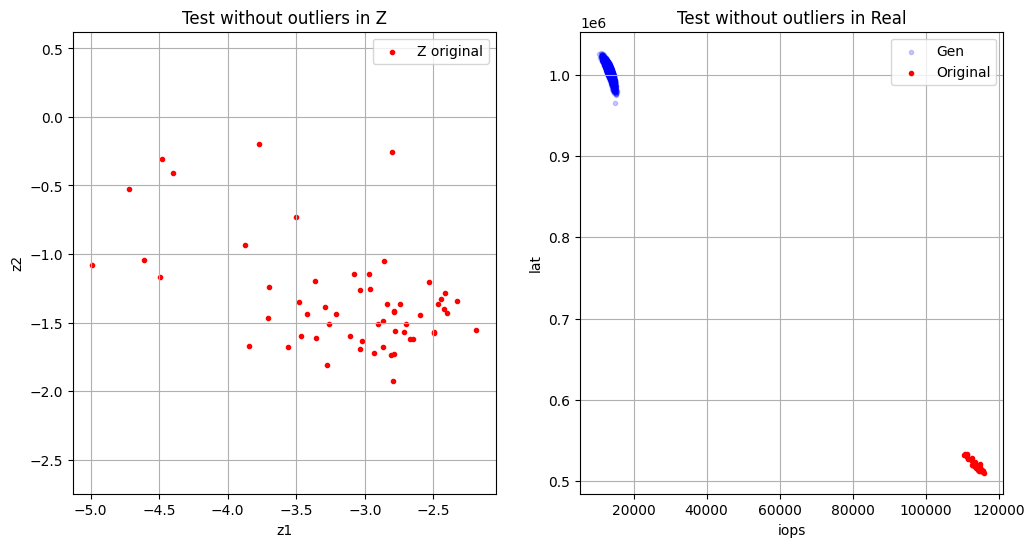

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

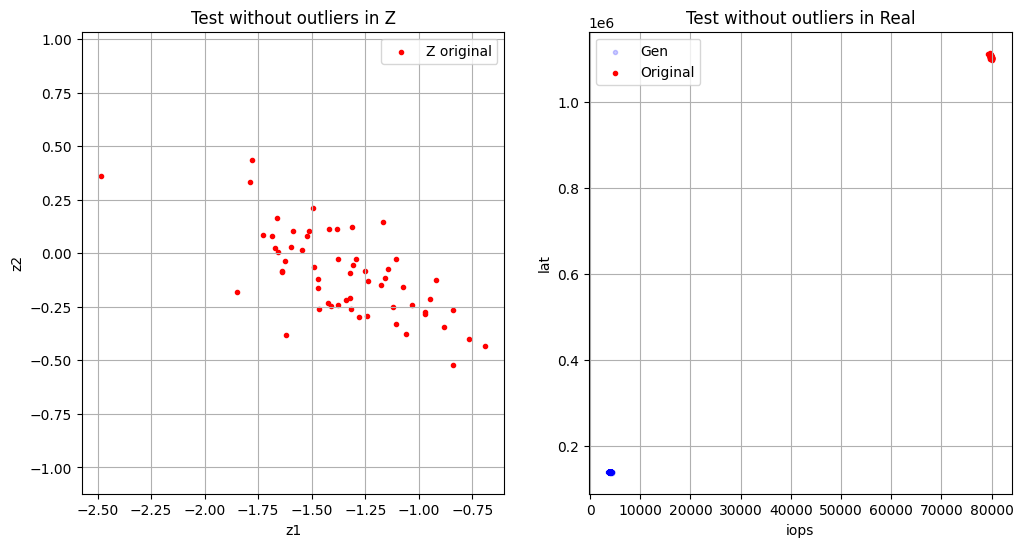

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

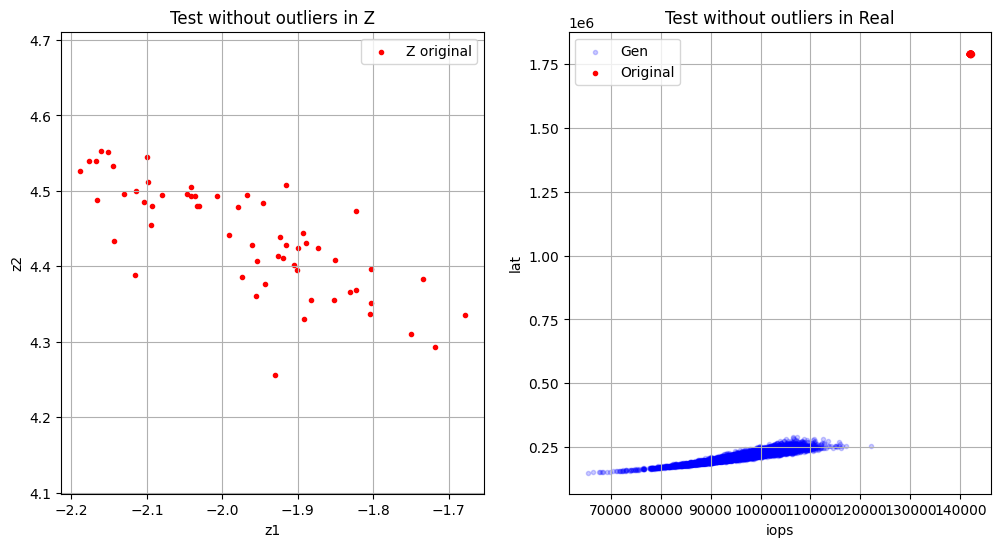

In [102]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

взять параметры как в статье

nlay=16 batch=200 hidden=10 epoch=80/200

## Final experiments without outliers 2

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

https://github.com/pytorch/pytorch/issues/15131

https://github.com/pytorch/pytorch/issues/59228

lr = 0.0001 падает

0.00001 что-то не так с лоссом



In [104]:
train = new_train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

# model = RealNVP(lr=0.00001, n_layers=6, n_epochs=80, batch_size=64, weight_decay=0.001, hidden=(100,100), activation='relu') # 200 , activation='relu'
model = RealNVP(lr=0.001, n_layers=16, n_epochs=80, batch_size=200, hidden=(100,), activation='tanh')
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

(-10.0, 10.0)

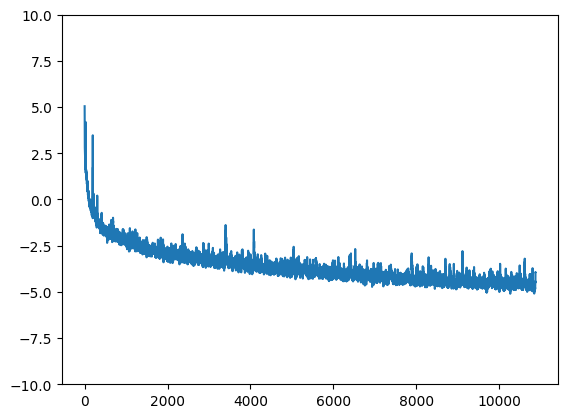

In [105]:
plt.plot(model.loss_history)
plt.ylim(-10, 10)

In [106]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [107]:
pd.unique(new_train[['id']]. values.ravel())

array(['hse-09142022-013313-z3769-read',
       'hse-09132022-220621-z47654-read',
       'hse-09132022-220621-z47654-write',
       'hse-09132022-145656-z44664-read',
       'hse-09132022-145656-z44664-write',
       'hse-09132022-114106-z26207-read',
       'hse-09132022-114106-z26207-write',
       'hse-09132022-193036-z66798-read',
       'hse-09132022-193036-z66798-write',
       'hse-09132022-144055-z72468-read',
       'hse-09132022-144055-z72468-write',
       'hse-09132022-204254-z78794-read',
       'hse-09132022-204254-z78794-write',
       'hse-09132022-225919-z97534-read',
       'hse-09132022-225919-z97534-write',
       'hse-09132022-231343-z49201-read',
       'hse-09132022-231343-z49201-write',
       'hse-09142022-005311-z97289-read',
       'hse-09142022-005311-z97289-write',
       'hse-09132022-181650-z73563-read',
       'hse-09132022-181650-z73563-write',
       'hse-09132022-183252-z8604-read',
       'hse-09132022-183252-z8604-write',
       'hse-09132022-23120

In [108]:
from torch.utils.data import TensorDataset, DataLoader

In [109]:
a = torch.tensor(list(train[train['id'] == 'hse-09132022-183252-z8604-read'][['iops', 'lat']].values) * 17)
print(a)

tensor([[  32372.0000, 1127303.8100],
        [  32484.0000, 1131804.9800],
        [  32750.0000, 1140352.2800],
        ...,
        [  32434.0000, 1110021.2300],
        [  32651.0000, 1102607.7300],
        [  32626.0000, 1109122.6700]], dtype=torch.float64)


In [110]:
ids = ['hse-09132022-220621-z47654-read', 'hse-09132022-183252-z8604-read',
       'hse-09132022-220621-z47654-write', 'hse-09132022-183252-z8604-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

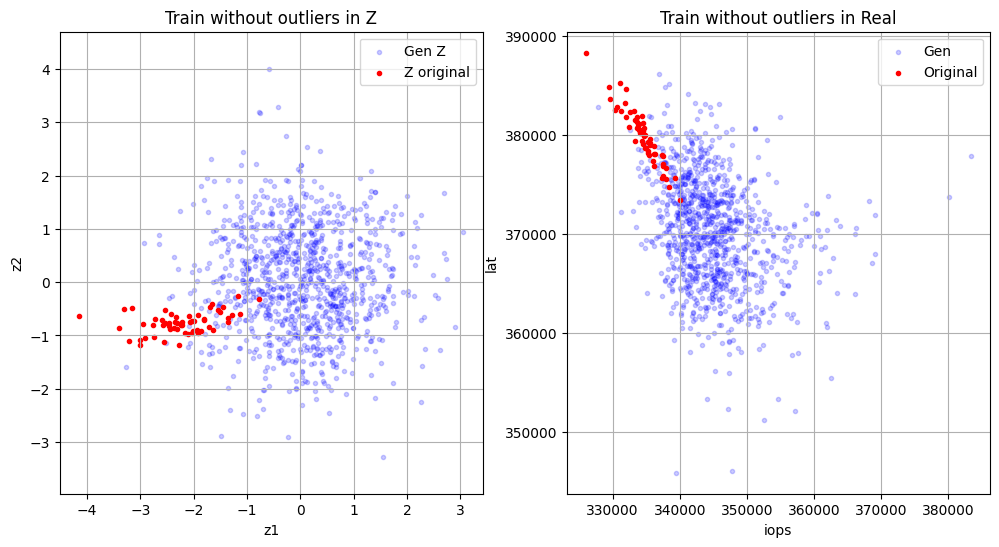

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [112]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [113]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In Z:
Frechet Distance         = 6.3830 +- 0.3796
Kolmogorov-Smirnov       = 0.7548 +- 0.0226
Cramer-von Mises         = 11.6619 +- 0.4057
Anderson-Darling         = 96.2400 +- 4.5307
ROC AUC                  = 0.8751 +- 0.0080
Kullback-Leibler KDE     = 1.6120 +- 0.1432
Jensen-Shannon KDE       = 0.3094 +- 0.0118
Maximum Mean Discrepancy = 0.7476 +- 0.0392


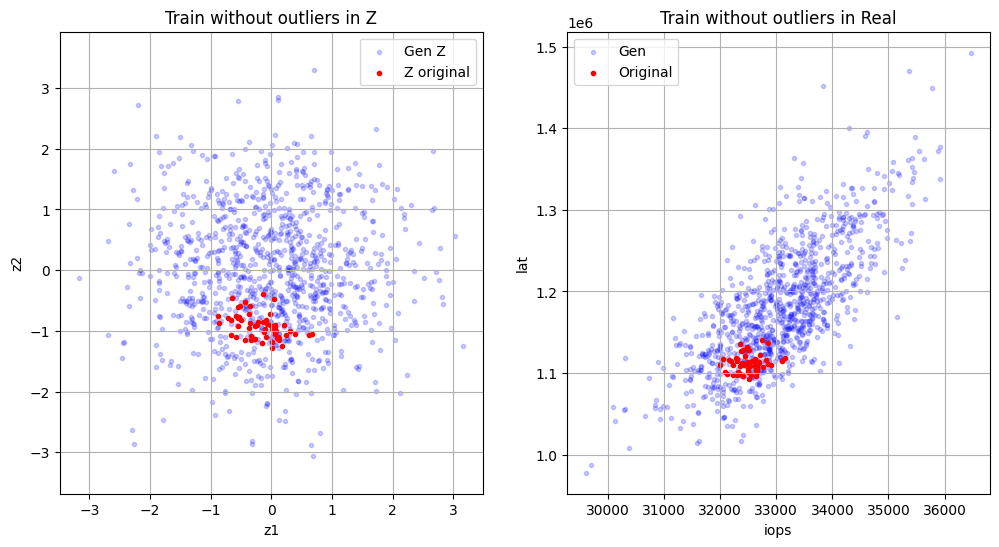

In [114]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [115]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [116]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 2.0353 +- 0.1086
Kolmogorov-Smirnov       = 0.5139 +- 0.0200
Cramer-von Mises         = 5.3544 +- 0.3066
Anderson-Darling         = 32.2564 +- 2.1231
ROC AUC                  = 0.6905 +- 0.0108
Kullback-Leibler KDE     = 0.4964 +- 0.0235
Jensen-Shannon KDE       = 0.1393 +- 0.0069
Maximum Mean Discrepancy = 0.2466 +- 0.0148


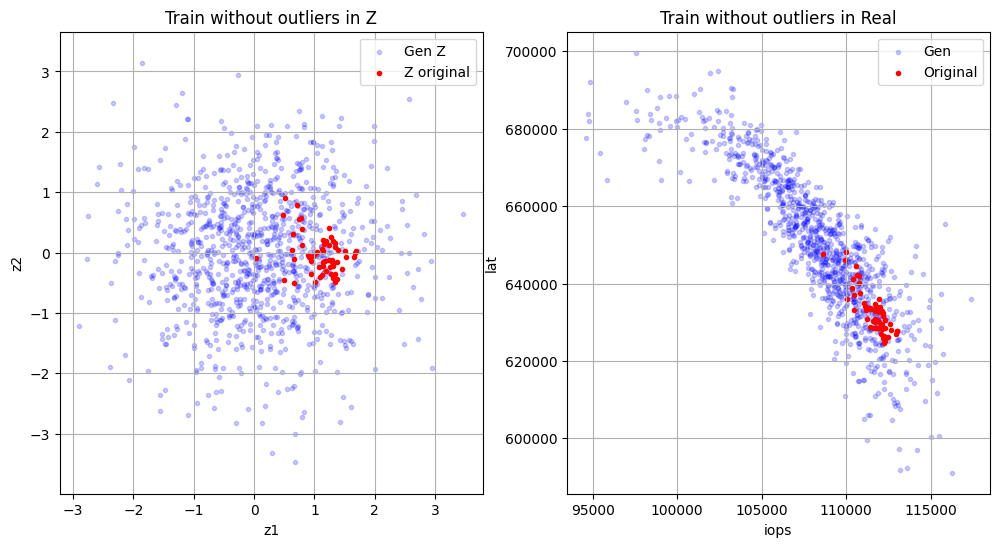

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [118]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [119]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 2.0623 +- 0.1450
Kolmogorov-Smirnov       = 0.4976 +- 0.0162
Cramer-von Mises         = 5.5212 +- 0.4206
Anderson-Darling         = 34.2939 +- 3.0320
ROC AUC                  = 0.6814 +- 0.0107
Kullback-Leibler KDE     = 0.5171 +- 0.0464
Jensen-Shannon KDE       = 0.1416 +- 0.0116
Maximum Mean Discrepancy = 0.2805 +- 0.0211


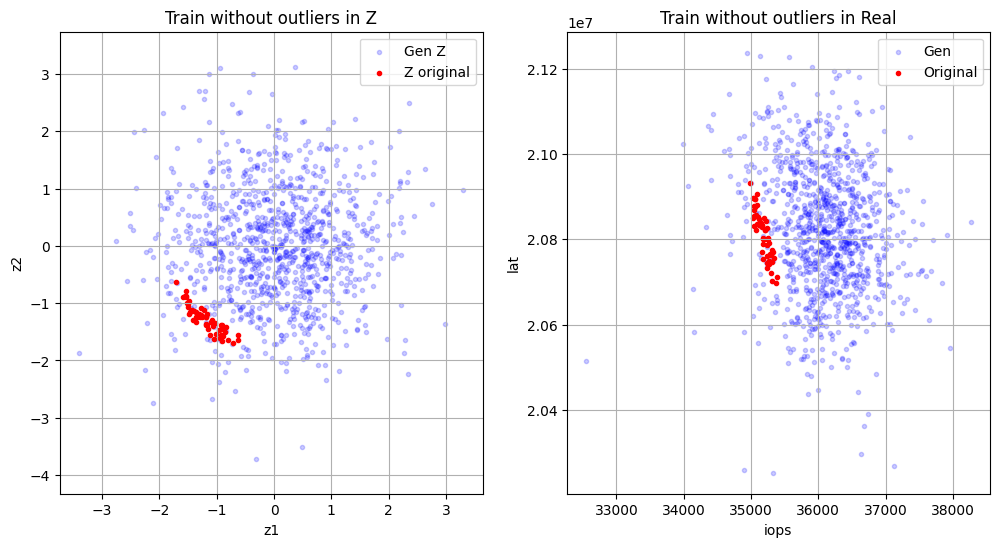

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [121]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [122]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 4.3723 +- 0.1387
Kolmogorov-Smirnov       = 0.7735 +- 0.0135
Cramer-von Mises         = 11.5699 +- 0.3648
Anderson-Darling         = 75.6209 +- 2.9109
ROC AUC                  = 0.8856 +- 0.0069
Kullback-Leibler KDE     = 1.0241 +- 0.0349
Jensen-Shannon KDE       = 0.2708 +- 0.0075
Maximum Mean Discrepancy = 0.5760 +- 0.0203


### RESULTS (VAL)

In [123]:
from torch.utils.data import TensorDataset, DataLoader

In [124]:
pd.unique(val[['id']]. values.ravel())

array(['hse-09132022-143120-z31269-read',
       'hse-09132022-143120-z31269-write',
       'hse-09132022-161303-z88497-read',
       'hse-09132022-161303-z88497-write',
       'hse-09132022-155340-z5879-read',
       'hse-09132022-155340-z5879-write',
       'hse-09132022-165443-z99348-read',
       'hse-09132022-165443-z99348-write',
       'hse-09132022-180849-z74771-read',
       'hse-09132022-180849-z74771-write',
       'hse-09132022-211502-z50964-read',
       'hse-09132022-211502-z50964-write',
       'hse-09142022-011049-z43035-read',
       'hse-09142022-011049-z43035-write',
       'hse-09142022-001439-z75543-read',
       'hse-09142022-001439-z75543-write',
       'hse-09132022-210347-z54822-read',
       'hse-09132022-210347-z54822-write',
       'hse-09142022-010111-z98172-read',
       'hse-09142022-010111-z98172-write',
       'hse-09142022-011401-z35494-read',
       'hse-09142022-011401-z35494-write',
       'hse-09132022-235524-z69201-read',
       'hse-09132022-2355

In [125]:
ids = ['hse-09132022-110545-z2206-read', 'hse-09132022-152126-z31190-read',
       'hse-09132022-110545-z2206-write', 'hse-09132022-152126-z31190-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_val = torch.tensor(val[val['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_val[:, 0])
    total_lat.append(y_val[:, 1])
    X_val = torch.tensor(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_val_ss = scaler.transform(y_val)
    X_val_ss = stscaler.transform(X_val)
    y_tst = torch.tensor(y_val_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_val_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

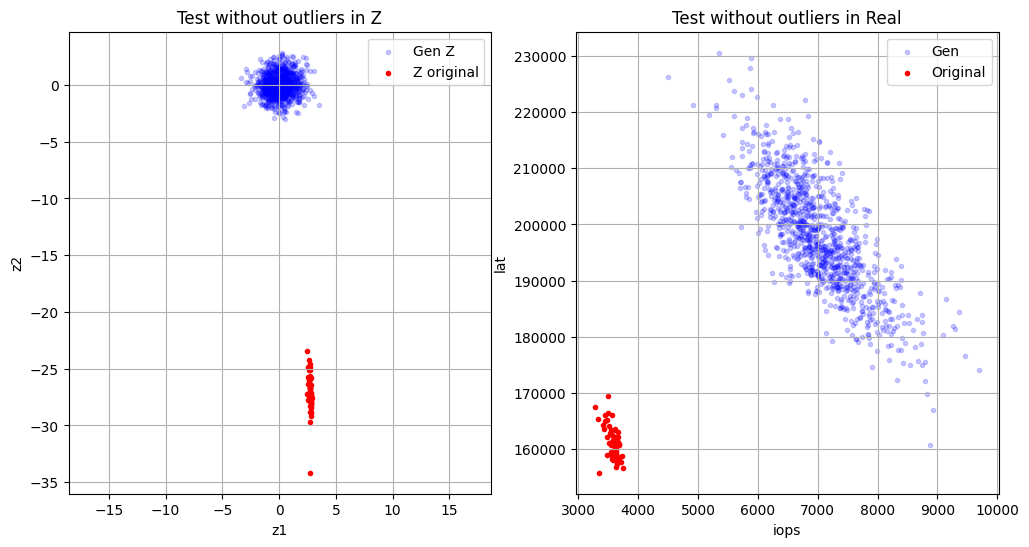

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [127]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [128]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 740.3911 +- 9.7412
Kolmogorov-Smirnov       = 0.9960 +- 0.0015
Cramer-von Mises         = 18.4332 +- 0.0625
Anderson-Darling         = 191.7395 +- 2.2049
ROC AUC                  = 0.9975 +- 0.0010
Kullback-Leibler KDE     = 8.4641 +- 0.1109
Jensen-Shannon KDE       = 0.6386 +- 0.0043
Maximum Mean Discrepancy = 1.2955 +- 0.0319


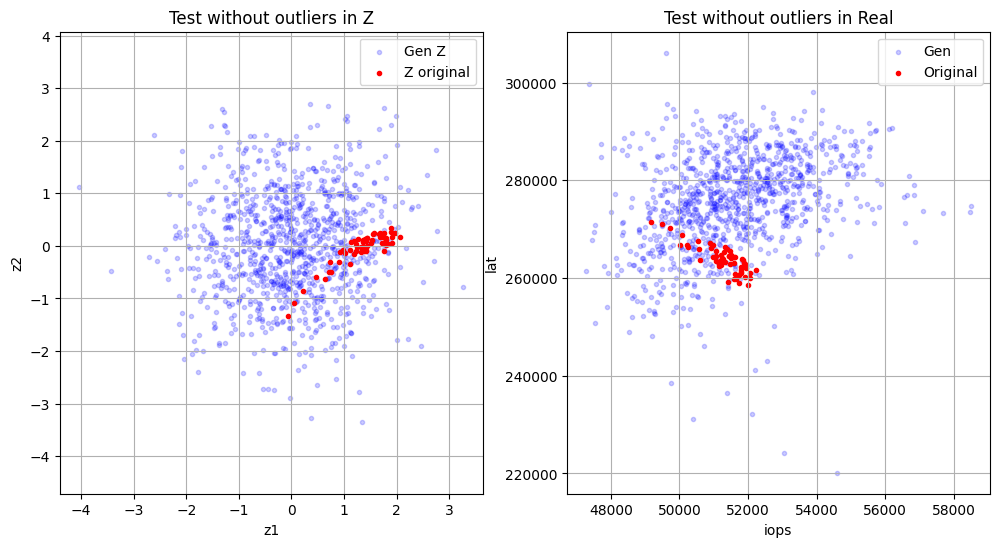

In [129]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [130]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [131]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 2.8261 +- 0.2177
Kolmogorov-Smirnov       = 0.5402 +- 0.0197
Cramer-von Mises         = 6.6427 +- 0.6418
Anderson-Darling         = 47.2069 +- 5.1675
ROC AUC                  = 0.7034 +- 0.0074
Kullback-Leibler KDE     = 0.6620 +- 0.0756
Jensen-Shannon KDE       = 0.1627 +- 0.0171
Maximum Mean Discrepancy = 0.3706 +- 0.0345


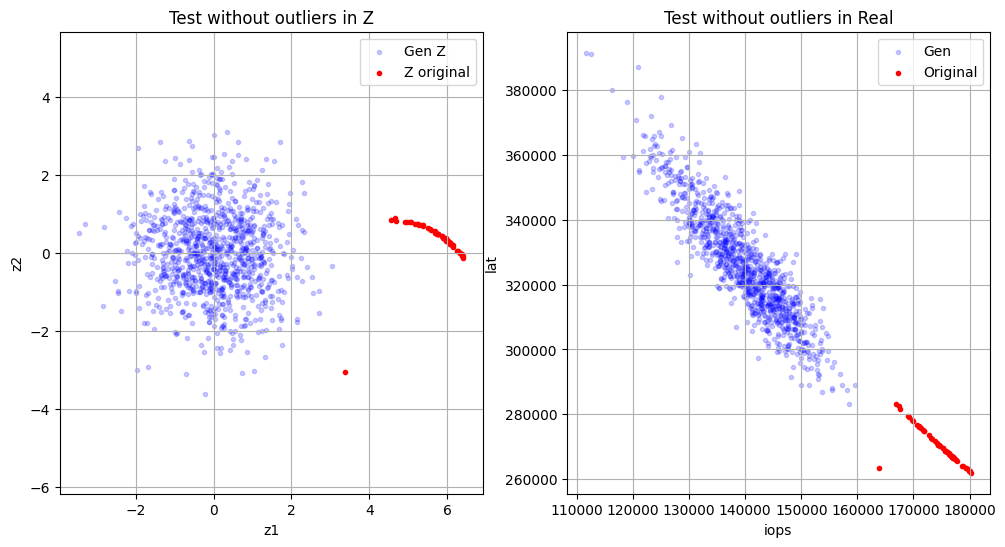

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [133]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [134]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 33.6778 +- 1.2197
Kolmogorov-Smirnov       = 0.7335 +- 0.0133
Cramer-von Mises         = 10.9654 +- 0.2481
Anderson-Darling         = 108.5967 +- 1.1798
ROC AUC                  = 0.8202 +- 0.0108
Kullback-Leibler KDE     = 6.6378 +- 0.0994
Jensen-Shannon KDE       = 0.4006 +- 0.0049
Maximum Mean Discrepancy = 1.4757 +- 0.0337


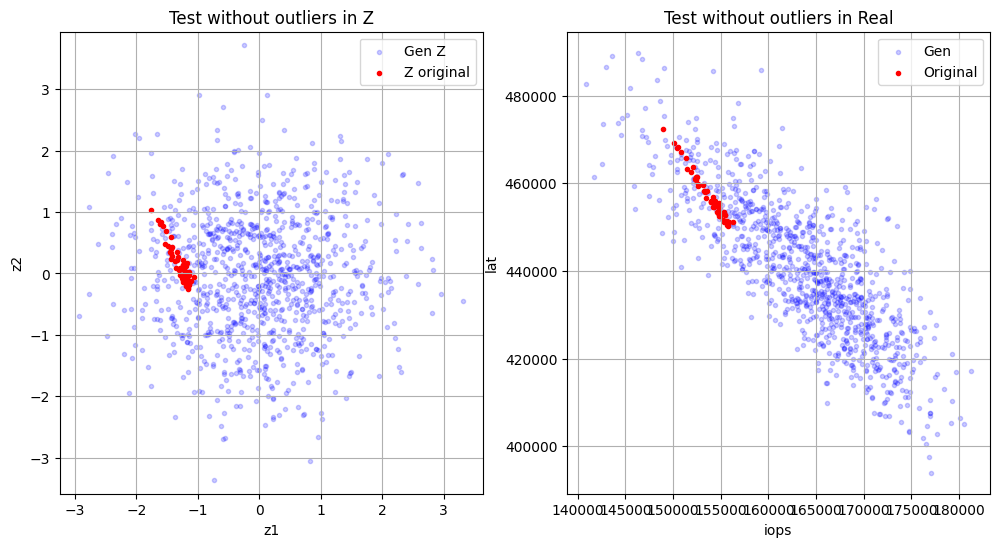

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [136]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [137]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

Frechet Distance         = 3.1016 +- 0.1206
Kolmogorov-Smirnov       = 0.6325 +- 0.0132
Cramer-von Mises         = 7.1858 +- 0.2437
Anderson-Darling         = 46.7225 +- 2.3003
ROC AUC                  = 0.7280 +- 0.0122
Kullback-Leibler KDE     = 0.6860 +- 0.0270
Jensen-Shannon KDE       = 0.1849 +- 0.0063
Maximum Mean Discrepancy = 0.3714 +- 0.0150


In [138]:
ids = pd.unique(val[['id']]. values.ravel())
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []
d = []
total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_val = torch.tensor(val[val['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_val[:, 0])
    total_lat.append(y_val[:, 1])
    X_val = torch.tensor(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_val_ss = scaler.transform(y_val)
    X_val_ss = stscaler.transform(X_val)
    y_tst = torch.tensor(y_val_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_val_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    # results_iops = []
    # results_lat = []
    iopsd = []
    latd = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        ztotal_iops.append(y_data[0][0])
        ztotal_lat.append(y_data[0][1])
        iopsd.append(y_data[0][0])
        latd.append(y_data[0][1])
    d.append((np.mean(iopsd) ** 2 + np.mean(latd) ** 2) ** 0.5)
    X_bigger = torch.tensor(list(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    # genresults_iops = []
    # genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        zgen_iops.append(y_data[0][0])
        zgen_lat.append(y_data[0][1])

    # ztotal_iops.append(results_iops)
    # ztotal_lat.append(results_lat)
    # zgen_iops.append(genresults_iops)
    # zgen_lat.append(genresults_lat)

In [139]:
len(zgen_lat)


347412

(-10.0, 10.0, -10.0, 10.0)

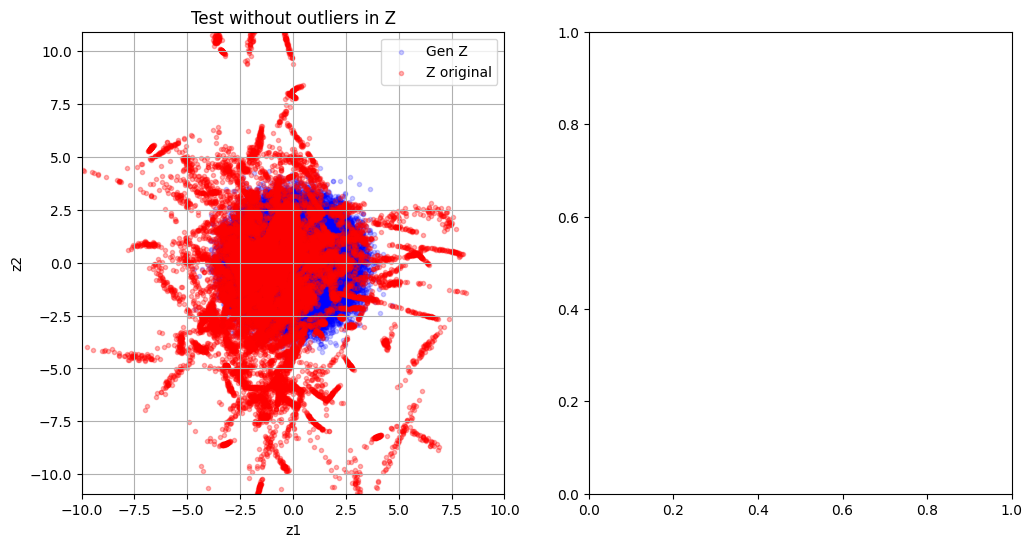

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops, zgen_lat, marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops, ztotal_lat, marker='.', label='Z original', color='red', linewidth=1, alpha=0.3)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()
ax1.axis(xmin=-10,xmax=10, ymin=-10,ymax=10)

# ax2.scatter(gen_iops, gen_lat, marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
# ax2.scatter(total_iops, total_lat, marker='.', label='Original', color='red', linewidth=1)
# ax2.set_title("Test without outliers in Real")
# # ax2.axis('equal')
# ax2.set(xlabel='iops', ylabel='lat')
# ax2.grid()
# ax2.legend()

In [141]:
# тут могла бы быть регрессия для d в зависимости от x

In [142]:
new_d = np.array(d)

In [143]:
sigmad = np.mean(new_d**2)
print(sigmad)

29.036209367908416


In [144]:
print(sigmad)

29.036209367908416


### RESULTS (TEST)

In [145]:
print(sigmad)

29.036209367908416


In [146]:
sigmad = 0

In [147]:
test = new_test

In [148]:
print(pd.unique(test[['id']].values.ravel()))

['hse-09132022-180712-z63065-read' 'hse-09132022-180712-z63065-write'
 'hse-09132022-212616-z36709-read' 'hse-09132022-212616-z36709-write'
 'hse-09132022-203942-z36542-read' 'hse-09132022-203942-z36542-write'
 'hse-09132022-113615-z47578-read' 'hse-09132022-113615-z47578-write'
 'hse-09132022-113127-z92275-read' 'hse-09132022-113127-z92275-write'
 'hse-09132022-202959-z97080-read' 'hse-09132022-202959-z97080-write'
 'hse-09132022-130756-z72964-read' 'hse-09132022-130756-z72964-write'
 'hse-09132022-152621-z23474-read' 'hse-09132022-152621-z23474-write'
 'hse-09132022-222402-z67880-read' 'hse-09132022-222402-z67880-write'
 'hse-09142022-002727-z41754-read' 'hse-09142022-002727-z41754-write'
 'hse-09132022-215503-z42747-read' 'hse-09132022-215503-z42747-write'
 'hse-09132022-154850-z69269-read' 'hse-09132022-154850-z69269-write'
 'hse-09132022-162550-z13863-read' 'hse-09132022-162550-z13863-write'
 'hse-09132022-131738-z64548-read' 'hse-09132022-131738-z64548-write'
 'hse-09132022-16335

In [149]:
ids = ['hse-09132022-212616-z36709-read', 'hse-09132022-212616-z36709-write',
       'hse-09132022-172841-z37264-write', 'hse-09132022-223341-z77063-read']
# ids = pd.unique(test[['id']]. values.ravel())
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    # y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    # y_gen = torch.tensor(y_gen, dtype=torch.float32)
    y_len = len(model.sample(stscaler.transform(X_bigger.clone().detach())))
    genresults_iops = []
    genresults_lat = []
    for i in range(10):
        d = np.random.normal(0, sigmad, 1)
        y_gen = np.random.normal(d, 1, (y_len, 2))

        y_gen = torch.tensor(y_gen, dtype=torch.float32)
        # gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
        # gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
        dataset = TensorDataset(y_gen, X_bigger_tst)

        for i, data in enumerate(DataLoader(dataset)):
            y_data= data[0]
            X_data = data[1]
            for lay in model.nf.layers:
                y_data = lay.g(y_data, X_data)
            y_data = scaler.inverse_transform(y_data.detach())
            genresults_iops.append(y_data[0][0])
            genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

In [150]:
zgen_iops

[[131621.60166334748,
  120019.1820901899,
  127944.63846262512,
  119189.7323444344,
  131386.27460874052,
  115259.9575631345,
  126007.55630019472,
  134971.81642647224,
  87258.40018750813,
  138955.8285953011,
  118922.10284938842,
  129038.05800069963,
  130032.47841081241,
  116955.22871079523,
  128691.21034261926,
  125288.59757929866,
  135126.11835697992,
  126558.47093170675,
  120880.73659516391,
  142755.915028827,
  147772.8305504036,
  138318.02337124464,
  148006.33152737038,
  123898.79951069376,
  124439.81219839596,
  144225.06496640234,
  125335.2873123648,
  141801.52698912597,
  117256.19980146647,
  127508.36730735764,
  118985.9995466415,
  133866.44356483372,
  123842.8733777138,
  118182.33810227783,
  128333.02628415167,
  142337.0231849613,
  131635.7596455039,
  114918.98323960243,
  118892.36150124142,
  104394.64167862783,
  127687.51413243444,
  141065.73571844632,
  124651.23945138817,
  102772.63828595338,
  113343.88762493388,
  124043.16575272847,
 

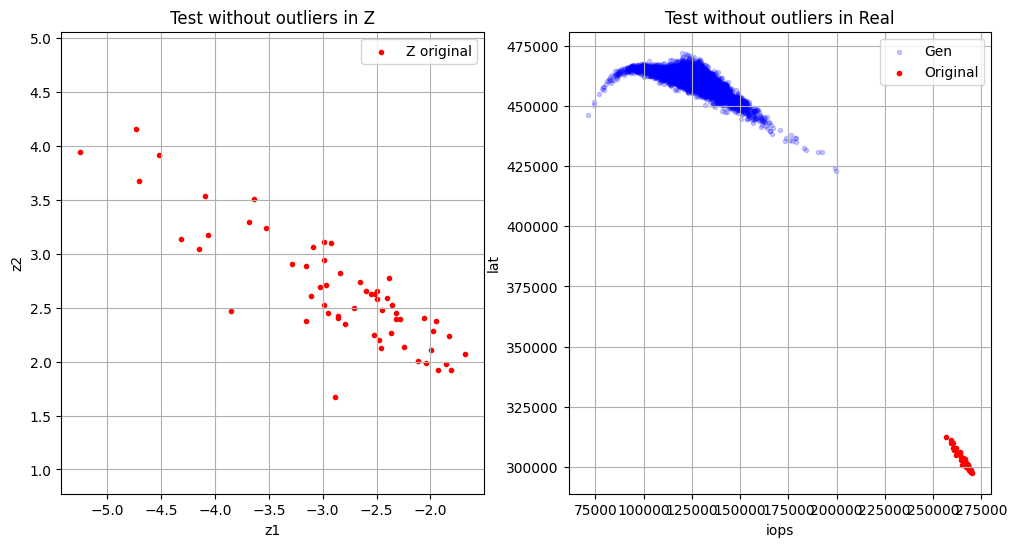

In [151]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [152]:
# arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
# arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
# arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
# arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [153]:
# print('In Z:')
# calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

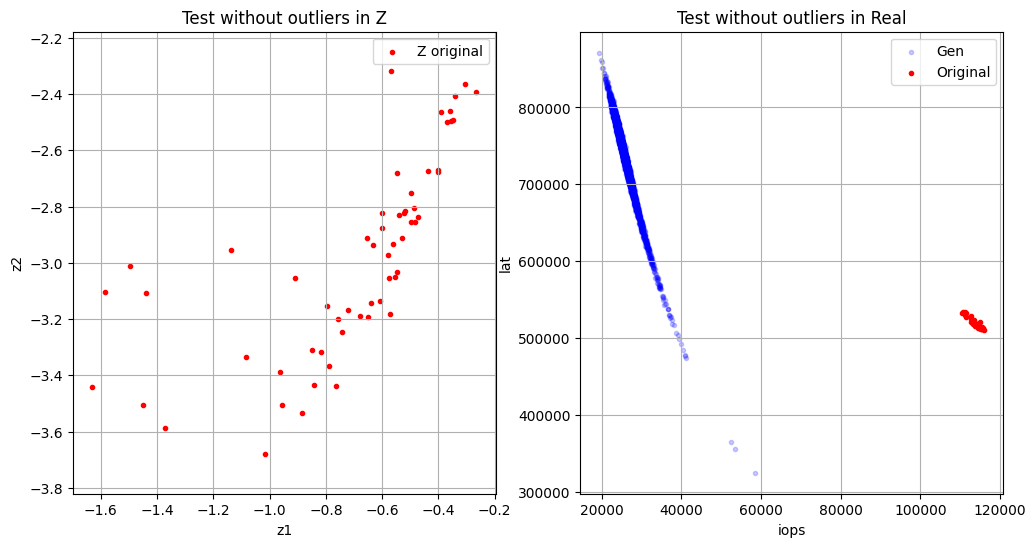

In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

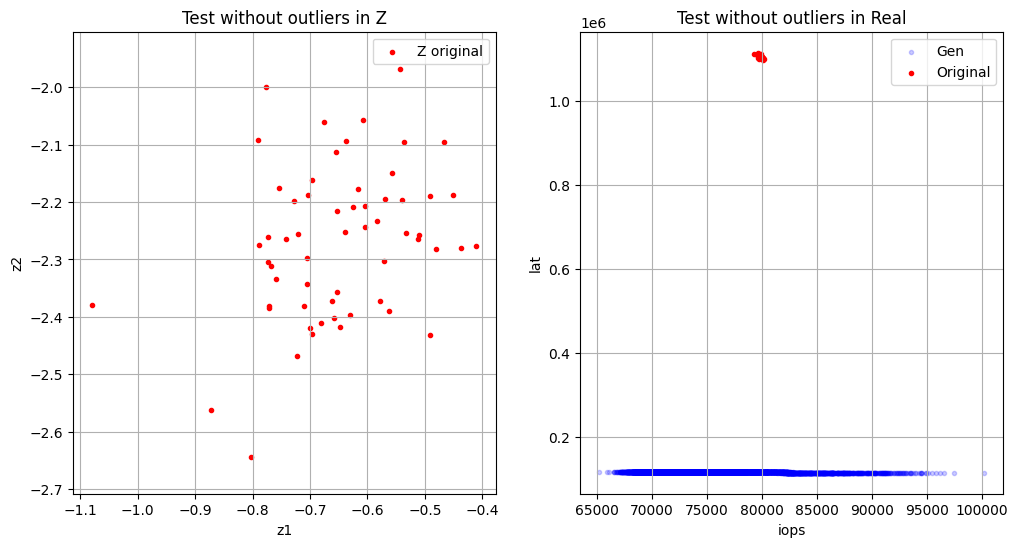

In [155]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

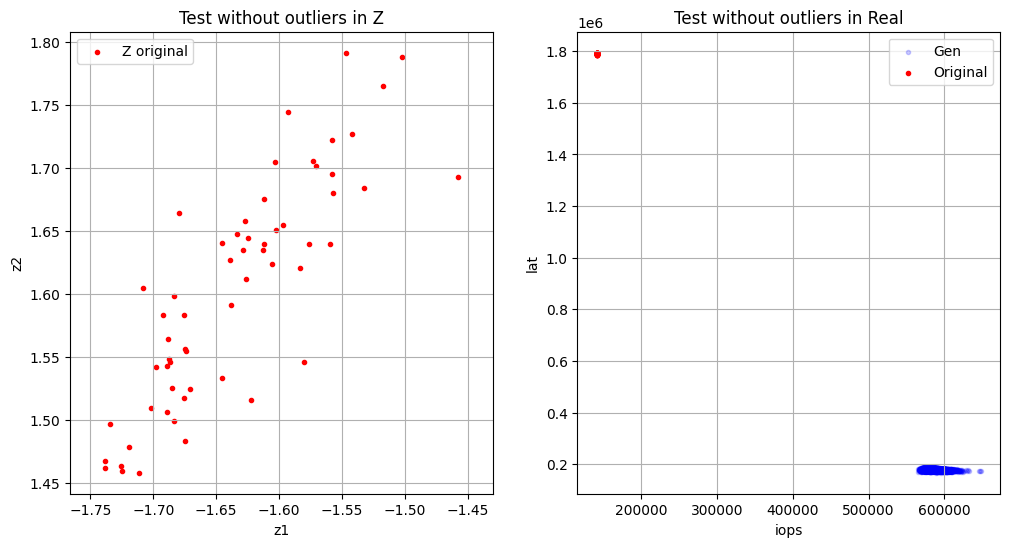

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

## Final experiments without outliers 3

In [157]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

https://github.com/pytorch/pytorch/issues/15131

https://github.com/pytorch/pytorch/issues/59228

lr = 0.0001 падает

0.00001 что-то не так с лоссом



In [158]:
train = new_train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

# model = RealNVP(lr=0.00001, n_layers=6, n_epochs=80, batch_size=64, weight_decay=0.001, hidden=(100,100), activation='relu') # 200 , activation='relu'
model = RealNVP(lr=0.01, n_layers=16, n_epochs=80, batch_size=200, hidden=(10,), activation='relu')
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

ValueError: Expected value argument (Tensor of shape (200, 2)) to be within the support (IndependentConstraint(Real(), 1)) of the distribution MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2])), but found invalid values:
tensor([[-5.8824e-01, -4.4828e-01],
        [ 9.3040e-01, -3.2976e-01],
        [-1.3079e-01,  1.4770e+00],
        [ 7.1142e-01, -3.4560e-01],
        [-3.0323e-01,  1.2740e-01],
        [-2.0899e+00, -1.0337e+00],
        [ 4.7486e-01,  2.3820e+00],
        [ 2.9654e-01, -3.4125e-01],
        [-5.9513e-01,  3.1682e-01],
        [ 9.6597e-01,  1.7955e-01],
        [ 2.3678e-01,  5.4771e-01],
        [-8.5869e-01,  1.2104e+00],
        [ 1.0952e+00,  2.5808e-01],
        [ 2.2061e-01,  9.9952e-01],
        [ 1.1969e+00, -1.1778e+00],
        [-4.1413e-01,  1.3589e+00],
        [ 1.4458e-01, -4.9370e-01],
        [ 8.4047e-01,  4.3827e-01],
        [ 5.9732e-02, -8.2823e-01],
        [ 1.6428e+00, -8.0599e-01],
        [-4.5954e-01, -5.8562e-01],
        [-2.4034e+00,  2.7415e+00],
        [ 3.3258e-01,  1.0347e+00],
        [ 1.1429e-01,  1.1787e+00],
        [-4.6855e+00, -1.2423e+00],
        [-4.2147e-01,  7.1918e-01],
        [ 8.7890e-01, -1.1581e+00],
        [-5.2354e-01,  8.8325e-01],
        [ 6.4511e-02, -9.4529e-01],
        [-1.6643e-01, -3.4554e-01],
        [-5.6891e-01,  5.5814e-01],
        [-2.4448e+00,  1.9561e+00],
        [-9.6875e-02, -5.5893e-01],
        [        nan,         nan],
        [ 2.7023e-01,  9.8000e-01],
        [ 8.6541e-01,  9.5469e-01],
        [ 6.4280e-01,  1.6435e+00],
        [-1.0538e+00, -6.3301e-01],
        [-8.1348e-01,  1.0850e+00],
        [-5.1237e-02,  3.6648e-01],
        [ 5.2200e-01, -2.9541e-01],
        [-9.6966e-01, -6.4576e-01],
        [ 1.2808e+00,  6.7704e-02],
        [ 1.0077e-01, -6.3429e-01],
        [ 1.7315e+00, -3.7063e-01],
        [-3.6347e-01,  5.1784e-01],
        [-1.0160e+00,  4.5076e-01],
        [-1.0609e+00,  1.1014e-01],
        [-1.6152e+00,  1.6789e+00],
        [ 5.6759e-01, -1.1129e+00],
        [ 1.1024e+00,  8.5068e-01],
        [ 1.5596e-01,  1.7891e+00],
        [-1.0269e+00,  1.3737e+00],
        [ 4.9508e-01,  1.0391e+00],
        [-5.0517e-01,  1.0113e+00],
        [-9.0491e-01,  2.7447e-01],
        [ 1.1903e+00, -1.0777e+00],
        [ 5.5810e-01,  6.1031e-01],
        [ 1.1142e+00,  2.9018e-01],
        [ 5.2177e-01,  4.5434e-01],
        [ 7.8278e-01, -1.1812e-01],
        [-6.4014e-01, -6.3342e-01],
        [ 7.4352e-01,  1.6132e+00],
        [ 1.9734e-03,  2.7704e-01],
        [-1.4674e+00, -5.3187e-01],
        [-7.2012e-02,  1.9774e+00],
        [ 1.5119e+00, -6.1117e-01],
        [-8.6057e-01,  1.5669e+00],
        [ 3.3094e-01,  9.0800e-01],
        [ 1.1424e+00,  2.6225e-01],
        [-1.6958e+00,  5.1680e-01],
        [-5.5322e-01,  2.0455e+00],
        [-1.5722e+00, -4.0515e-01],
        [ 7.2544e-01, -1.0723e+00],
        [-1.5286e+00, -4.3018e-01],
        [ 1.7310e-01,  6.0523e-01],
        [ 7.1875e-01,  1.4349e-01],
        [ 5.8126e-01,  1.5739e-01],
        [ 2.8650e-01, -2.1539e-02],
        [-8.5355e-01,  2.0122e-01],
        [ 4.4928e-02,  1.2302e+00],
        [-6.9022e-01,  1.5613e+00],
        [-2.3552e-01, -1.2319e-01],
        [ 5.3310e-01, -1.7498e-01],
        [ 9.7207e-02, -8.2301e-01],
        [ 1.3765e+00,  2.6594e-01],
        [-2.8727e-01, -4.9503e-01],
        [-7.8687e-01,  8.9158e-01],
        [ 3.8685e-01,  2.1292e+00],
        [ 2.8998e-01, -3.4816e-01],
        [ 5.2414e-01,  1.7252e-01],
        [-9.0595e-01,  1.2402e+00],
        [-1.9153e-01,  5.8142e-01],
        [-2.5136e-01, -2.6813e-01],
        [-4.4409e+00, -1.2212e+00],
        [-1.0283e+00,  2.1952e+00],
        [-4.8462e-01,  1.6423e-01],
        [-1.8358e-01,  6.6554e-01],
        [-1.8501e-01,  3.1251e-01],
        [ 6.3718e-01,  1.8062e+00],
        [ 1.2262e-01,  1.7554e-01],
        [-3.8150e-01,  2.9278e-01],
        [-1.5735e-01,  1.6112e+00],
        [ 5.0528e-01, -6.7692e-01],
        [-1.2561e+00,  1.4314e-01],
        [ 3.0316e-01,  2.6878e+00],
        [-2.7824e-01,  5.1853e-01],
        [ 5.6224e-01,  1.1187e+00],
        [ 1.6454e-01,  5.0933e-01],
        [ 4.9148e-01, -3.0189e-01],
        [-1.4331e+00,  3.2124e-01],
        [-7.1796e-01,  7.6112e-01],
        [-2.5187e-01, -4.4532e-01],
        [-1.4915e+00,  1.4109e+00],
        [-5.6583e-01,  7.9486e-01],
        [-7.1174e-02,  4.8048e-01],
        [ 8.5500e-01, -5.0833e-01],
        [-5.0957e-01,  3.5326e-01],
        [ 1.6242e+00, -4.9402e-01],
        [ 3.6596e-01, -1.0336e+00],
        [ 6.4790e-01,  1.7769e+00],
        [-1.2834e+00, -1.4977e+00],
        [ 3.7711e-01,  1.7457e-01],
        [ 4.1108e-01,  5.7705e-02],
        [ 1.2699e+00, -1.0469e+00],
        [ 1.7208e-01, -2.8357e-01],
        [ 1.9103e-01, -3.2949e-01],
        [ 3.4190e-01, -3.9012e-01],
        [ 6.9981e-01, -1.0722e+00],
        [-2.0433e+00,  6.0412e-01],
        [ 3.2719e-02,  5.0923e-01],
        [-6.2842e-01,  1.2687e+00],
        [ 5.2868e-01, -1.4106e+00],
        [-5.3835e-01,  6.5005e-01],
        [-1.0499e+00, -4.9536e-01],
        [-1.0774e+00, -5.5578e-02],
        [ 4.0653e-01,  1.1659e-01],
        [-8.5989e-01,  4.2832e-01],
        [ 4.6914e-01,  2.0104e-01],
        [-2.2132e-01,  6.4090e-01],
        [ 1.6125e+00, -7.4472e-01],
        [-1.0996e+00, -4.6580e-01],
        [ 5.7693e-01, -1.1506e+00],
        [ 3.2360e-01,  3.5591e-01],
        [-5.7713e-01,  7.9121e-01],
        [ 3.4321e-01,  1.7093e+00],
        [ 5.9980e-01, -1.1278e+00],
        [-6.0577e-02,  8.1129e-01],
        [-1.3220e+00,  2.0904e+00],
        [-6.0698e-01,  5.3515e-01],
        [ 4.1870e-01, -7.3684e-01],
        [-2.5052e-02,  8.6916e-01],
        [-2.7350e-01,  1.2541e+00],
        [-2.6862e-01,  9.2930e-01],
        [-1.2490e+00,  6.8632e-01],
        [ 5.8467e-02,  4.1724e-01],
        [ 1.3072e+00,  7.3898e-01],
        [-6.3549e-01, -8.2346e-01],
        [ 9.2250e-01,  2.5929e-01],
        [-1.9914e+00,  1.9888e+00],
        [ 3.2055e-02, -9.4014e-01],
        [-3.4572e-01,  1.2130e+00],
        [ 1.1245e+00,  8.7436e-01],
        [ 5.6212e-02,  7.7558e-01],
        [ 6.1979e-03,  1.2603e+00],
        [-1.8523e-01, -9.0159e-01],
        [-1.3304e+00,  2.0107e-01],
        [-1.0417e+00,  1.8184e+00],
        [-4.5980e-01, -8.9777e-02],
        [ 1.1927e-01,  2.4999e-01],
        [ 7.2012e-01,  1.0292e+00],
        [ 4.1546e-01,  1.3006e+00],
        [-1.3340e+00,  1.0641e+00],
        [ 1.3542e+00,  2.6585e-01],
        [ 5.7341e-01, -9.4149e-01],
        [-1.2578e+00,  6.8413e-01],
        [ 9.0325e-01,  1.2228e-01],
        [ 2.2376e-01,  5.4751e-01],
        [ 2.1839e-01,  9.1508e-01],
        [-1.1809e-01,  1.2767e+00],
        [-6.4886e-02, -1.8619e-01],
        [ 9.4105e-01, -1.3998e+00],
        [-9.3528e-01,  1.4032e+00],
        [-4.1861e-01,  1.6818e+00],
        [-1.4543e-01,  5.2620e-01],
        [-2.3571e-01,  4.9821e-01],
        [-7.2685e-01,  9.3942e-01],
        [ 7.3535e-02, -3.6056e-01],
        [-4.3968e-01, -1.1719e+00],
        [ 5.9559e-01,  1.4999e-01],
        [-8.9309e-01, -2.5458e-01],
        [ 5.7086e-01,  2.1640e-01],
        [-3.4245e-02, -1.4092e+00],
        [-2.1551e-01,  5.7969e-01],
        [ 4.4783e-01,  1.4411e+00],
        [-1.1407e+00,  2.3987e+00],
        [-3.4968e-01,  2.9553e-01],
        [ 1.3179e+00,  4.3713e-01],
        [ 1.1848e+00, -1.0280e+00],
        [ 1.3209e+00, -3.1696e-02]], grad_fn=<AddBackward0>)

In [ ]:
plt.plot(model.loss_history)
plt.ylim(-10, 10)

In [ ]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [ ]:
pd.unique(new_train[['id']]. values.ravel())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
a = torch.tensor(list(train[train['id'] == 'hse-09132022-183252-z8604-read'][['iops', 'lat']].values) * 17)
print(a)

In [ ]:
ids = ['hse-09132022-220621-z47654-read', 'hse-09132022-183252-z8604-read',
       'hse-09132022-220621-z47654-write', 'hse-09132022-183252-z8604-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

### RESULTS (VAL)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
pd.unique(val[['id']]. values.ravel())

In [ ]:
ids = ['hse-09132022-110545-z2206-read', 'hse-09132022-152126-z31190-read',
       'hse-09132022-110545-z2206-write', 'hse-09132022-152126-z31190-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_val = torch.tensor(val[val['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_val[:, 0])
    total_lat.append(y_val[:, 1])
    X_val = torch.tensor(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_val_ss = scaler.transform(y_val)
    X_val_ss = stscaler.transform(X_val)
    y_tst = torch.tensor(y_val_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_val_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
ids = pd.unique(val[['id']]. values.ravel())
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []
d = []
total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_val = torch.tensor(val[val['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_val[:, 0])
    total_lat.append(y_val[:, 1])
    X_val = torch.tensor(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_val_ss = scaler.transform(y_val)
    X_val_ss = stscaler.transform(X_val)
    y_tst = torch.tensor(y_val_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_val_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    # results_iops = []
    # results_lat = []
    iopsd = []
    latd = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        ztotal_iops.append(y_data[0][0])
        ztotal_lat.append(y_data[0][1])
        iopsd.append(y_data[0][0])
        latd.append(y_data[0][1])
    d.append((np.mean(iopsd) ** 2 + np.mean(latd) ** 2) ** 0.5)
    X_bigger = torch.tensor(list(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    # genresults_iops = []
    # genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        zgen_iops.append(y_data[0][0])
        zgen_lat.append(y_data[0][1])

    # ztotal_iops.append(results_iops)
    # ztotal_lat.append(results_lat)
    # zgen_iops.append(genresults_iops)
    # zgen_lat.append(genresults_lat)

In [ ]:
len(zgen_lat)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops, zgen_lat, marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops, ztotal_lat, marker='.', label='Z original', color='red', linewidth=1, alpha=0.3)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()
ax1.axis(xmin=-10,xmax=10, ymin=-10,ymax=10)

# ax2.scatter(gen_iops, gen_lat, marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
# ax2.scatter(total_iops, total_lat, marker='.', label='Original', color='red', linewidth=1)
# ax2.set_title("Test without outliers in Real")
# # ax2.axis('equal')
# ax2.set(xlabel='iops', ylabel='lat')
# ax2.grid()
# ax2.legend()

In [ ]:
# тут могла бы быть регрессия для d в зависимости от x

In [ ]:
new_d = np.array(d)

In [ ]:
sigmad = np.mean(new_d**2)
print(sigmad)

In [ ]:
print(sigmad)

### RESULTS (TEST)

In [ ]:
print(sigmad)

In [ ]:
sigmad = 0

In [ ]:
test = new_test

In [ ]:
print(pd.unique(test[['id']].values.ravel()))

In [ ]:
ids = ['hse-09132022-212616-z36709-read', 'hse-09132022-212616-z36709-write',
       'hse-09132022-172841-z37264-write', 'hse-09132022-223341-z77063-read']
# ids = pd.unique(test[['id']]. values.ravel())
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    # y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    # y_gen = torch.tensor(y_gen, dtype=torch.float32)
    y_len = len(model.sample(stscaler.transform(X_bigger.clone().detach())))
    genresults_iops = []
    genresults_lat = []
    for i in range(10):
        d = np.random.normal(0, sigmad, 1)
        y_gen = np.random.normal(d, 1, (y_len, 2))

        y_gen = torch.tensor(y_gen, dtype=torch.float32)
        # gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
        # gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
        dataset = TensorDataset(y_gen, X_bigger_tst)

        for i, data in enumerate(DataLoader(dataset)):
            y_data= data[0]
            X_data = data[1]
            for lay in model.nf.layers:
                y_data = lay.g(y_data, X_data)
            y_data = scaler.inverse_transform(y_data.detach())
            genresults_iops.append(y_data[0][0])
            genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

In [ ]:
zgen_iops

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
# arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
# arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
# arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
# arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
# print('In Z:')
# calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

## Final experiments without outliers 4

In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

https://github.com/pytorch/pytorch/issues/15131

https://github.com/pytorch/pytorch/issues/59228

lr = 0.0001 падает

0.00001 что-то не так с лоссом



In [160]:
train = new_train
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

# model = RealNVP(lr=0.00001, n_layers=6, n_epochs=80, batch_size=64, weight_decay=0.001, hidden=(100,100), activation='relu') # 200 , activation='relu'
model = RealNVP(lr=0.001, n_layers=16, n_epochs=80, batch_size=200, hidden=(100,), activation='relu')
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

ValueError: Expected value argument (Tensor of shape (200, 2)) to be within the support (IndependentConstraint(Real(), 1)) of the distribution MultivariateNormal(loc: torch.Size([2]), covariance_matrix: torch.Size([2, 2])), but found invalid values:
tensor([[-0.2131, -0.8281],
        [ 0.4466,  1.3705],
        [ 0.0764,  1.0651],
        [ 1.1695,  0.3663],
        [ 0.1647,  1.4604],
        [-0.7371, -1.1100],
        [ 0.5440, -0.0612],
        [ 0.3950, -1.3296],
        [ 0.5147, -0.3568],
        [ 0.0763, -0.4431],
        [-0.3668,  0.2274],
        [ 1.1309,  0.1814],
        [ 0.6911,  1.1297],
        [ 0.1893,  0.8919],
        [ 0.3865,  0.9273],
        [ 0.1653,  1.4149],
        [ 0.2530, -0.1988],
        [ 0.4224,  1.4773],
        [-0.5933, -1.5125],
        [ 0.1305, -1.4100],
        [ 0.0606, -0.1974],
        [ 0.1828,  0.8885],
        [-2.7013, -1.0631],
        [ 0.6128, -0.9925],
        [-1.1546, -1.2244],
        [ 0.9653,  0.2557],
        [ 0.2154,  0.3882],
        [ 0.8627,  0.0447],
        [-0.0255,  0.2044],
        [-0.8262,  1.4946],
        [-0.7061, -0.7617],
        [ 0.9652,  0.7624],
        [ 0.4695,  1.7235],
        [ 0.1770,  0.7275],
        [-0.0344, -0.4891],
        [ 0.3678,  0.6581],
        [ 0.9323,  0.5467],
        [-0.1188, -0.2362],
        [-0.4095, -0.2875],
        [ 0.8242, -0.5699],
        [ 0.9103, -1.1445],
        [-0.0049,  0.3807],
        [ 0.4811,  0.9595],
        [-1.6777, -0.2648],
        [ 0.1677, -0.6957],
        [ 0.4227,  1.4771],
        [ 0.4159,  1.0028],
        [-2.5989, -0.9755],
        [-0.4308, -1.0779],
        [ 0.0875,  0.4372],
        [ 0.2528,  0.0299],
        [-0.1319,  0.1733],
        [ 0.0863,  0.4417],
        [ 0.6385, -0.5278],
        [ 1.1946,  1.2090],
        [-0.8264, -0.9333],
        [ 0.4621, -0.3632],
        [ 0.4771,  1.0042],
        [ 0.0113,  0.5793],
        [-1.9029, -1.0851],
        [ 0.4274,  0.1919],
        [ 0.7280,  0.4280],
        [ 0.0765,  0.4179],
        [ 0.6472,  0.9604],
        [ 0.1054,  0.1192],
        [ 0.0672,  0.1525],
        [ 0.1844, -0.3333],
        [ 0.6239,  0.3927],
        [ 0.1897, -0.2457],
        [-0.7489, -0.6095],
        [-0.3505,  0.0773],
        [ 1.2513, -0.1652],
        [ 1.2385, -1.0500],
        [ 0.0854,  0.4352],
        [-0.2239, -1.2749],
        [ 0.7117, -0.0253],
        [ 0.2574,  0.6938],
        [-0.3143,  0.9686],
        [-0.2135, -1.2621],
        [-0.1290,  0.2221],
        [ 0.5402,  0.4049],
        [ 0.1768,  0.3431],
        [ 0.2020, -1.1484],
        [ 0.5973, -1.0846],
        [ 0.7246,  0.2629],
        [-0.8379, -0.0329],
        [ 0.2626,  0.1365],
        [ 0.5316, -0.0916],
        [ 0.7488,  0.1392],
        [-0.4978,  0.0354],
        [-0.1409,  0.5038],
        [-0.0507,  0.7711],
        [ 0.6676,  1.4154],
        [-0.7423,  1.9017],
        [ 0.6598,  0.3089],
        [ 0.1842,  0.3379],
        [ 1.1441,  0.1217],
        [ 0.6408,  1.0270],
        [    nan,     nan],
        [ 0.5758,  0.5254],
        [ 0.1891, -0.4114],
        [-0.5922, -1.5307],
        [ 0.5120,  0.6776],
        [ 0.3397, -0.7372],
        [ 0.4372, -0.8051],
        [ 0.1656,  1.4154],
        [-0.0290, -0.1629],
        [ 0.9688,  0.3502],
        [-2.0820,  1.0466],
        [ 0.8226,  1.1224],
        [ 0.8446,  0.5419],
        [ 0.4905,  0.2738],
        [ 1.1777,  0.3507],
        [ 0.8424,  0.5668],
        [-0.1444,  0.4210],
        [ 0.1824, -0.3119],
        [-0.3913,  0.2100],
        [ 0.3889, -0.3087],
        [-0.4979,  0.6567],
        [ 0.4628, -0.0755],
        [ 0.3515, -0.3578],
        [ 0.2099,  0.1948],
        [ 0.8190,  1.1545],
        [ 1.1299, -0.2891],
        [-0.2276, -1.2865],
        [-0.2556,  0.3643],
        [ 0.6525,  0.6961],
        [-0.8570, -0.8412],
        [ 0.2582,  1.2765],
        [ 0.4886, -0.3526],
        [-0.8724,  1.0707],
        [ 0.2165, -1.1789],
        [ 0.5935,  0.3672],
        [ 0.6624,  0.7066],
        [-0.3679, -1.5733],
        [ 0.6336, -0.2653],
        [-0.6577,  0.4698],
        [ 0.2439,  0.1049],
        [ 0.9705, -1.0339],
        [-2.7915, -0.3754],
        [-0.3339, -1.7572],
        [ 0.7464,  0.1449],
        [ 1.0125,  0.3338],
        [ 0.6661, -1.2111],
        [-0.4325,  0.1577],
        [ 0.4344,  1.8374],
        [ 0.0258,  0.9311],
        [ 0.6308,  0.6741],
        [ 0.2265, -0.3683],
        [-0.6369,  0.4926],
        [ 0.3930, -1.3548],
        [ 0.5679,  0.1841],
        [ 0.0647,  0.1531],
        [ 0.9615,  0.3081],
        [ 1.1321,  0.1008],
        [ 1.0117,  0.2507],
        [ 0.5827,  0.1002],
        [ 0.7885, -0.8318],
        [ 0.6113,  0.2835],
        [ 1.2422,  1.3935],
        [ 0.3752,  1.2755],
        [ 0.2251,  0.7956],
        [-1.5947, -1.3673],
        [-0.2223, -1.2854],
        [ 0.8044, -0.1551],
        [ 0.3427,  0.2482],
        [ 0.8704,  0.0226],
        [-0.6590,  1.7114],
        [ 0.6509, -1.1737],
        [-0.5779, -1.5446],
        [ 0.2139,  0.0868],
        [ 0.7007,  0.2829],
        [ 0.1953,  0.2353],
        [ 0.6382,  0.0616],
        [-0.3676,  0.2284],
        [ 0.4232,  1.4766],
        [ 0.9036, -1.3662],
        [ 0.5994, -0.3119],
        [ 0.3906,  0.1848],
        [-0.3550, -1.7797],
        [ 1.0150, -0.0117],
        [ 0.4230, -1.3587],
        [-0.1596,  0.4127],
        [ 0.5343, -0.1113],
        [ 1.0378, -0.6463],
        [ 0.0559, -0.1702],
        [ 0.5910, -1.2988],
        [ 0.5413,  0.1963],
        [ 0.9242, -0.0735],
        [ 0.9060, -1.3714],
        [ 0.4048, -1.3216],
        [ 0.8414,  0.5752],
        [ 0.4420,  1.4613],
        [ 0.2022,  0.1641],
        [-0.1605,  0.7095],
        [ 0.4209, -0.5787],
        [-3.1805, -0.4984],
        [ 0.6993, -0.9656],
        [ 0.5056,  0.2835],
        [ 0.2471,  1.7407]], grad_fn=<AddBackward0>)

In [ ]:
plt.plot(model.loss_history)
plt.ylim(-10, 10)

In [ ]:
def calc_metrics(X, Y):
    mu, sigma = metrics.frechet_distance(X, Y)
    print(r"Frechet Distance         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kolmogorov_smirnov_1d(X, Y)
    print(r"Kolmogorov-Smirnov       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.cramer_von_mises_1d(X, Y)
    print(r"Cramer-von Mises         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.anderson_darling_1d(X, Y)
    print(r"Anderson-Darling         = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.roc_auc_score_1d(X, Y)
    print(r"ROC AUC                  = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.kullback_leibler_1d_kde(X, Y)
    print(r"Kullback-Leibler KDE     = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.jensen_shannon_1d_kde(X, Y)
    print(r"Jensen-Shannon KDE       = %.4f +- %.4f" % (mu, sigma))
    mu, sigma = metrics.maximum_mean_discrepancy(X, Y)
    print(r"Maximum Mean Discrepancy = %.4f +- %.4f" % (mu, sigma))

### RESULTS (TRAIN)

In [ ]:
pd.unique(new_train[['id']]. values.ravel())

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
a = torch.tensor(list(train[train['id'] == 'hse-09132022-183252-z8604-read'][['iops', 'lat']].values) * 17)
print(a)

In [ ]:
ids = ['hse-09132022-220621-z47654-read', 'hse-09132022-183252-z8604-read',
       'hse-09132022-220621-z47654-write', 'hse-09132022-183252-z8604-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_train = torch.tensor(train[train['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_train[:, 0])
    total_lat.append(y_train[:, 1])
    X_train = torch.tensor(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_train_ss = scaler.transform(y_train)
    X_train_ss = stscaler.transform(X_train)
    y_tst = torch.tensor(y_train_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_train_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(train[train['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
print('In Z:')
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Train without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Train without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

### RESULTS (VAL)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
pd.unique(val[['id']]. values.ravel())

In [ ]:
ids = ['hse-09132022-110545-z2206-read', 'hse-09132022-152126-z31190-read',
       'hse-09132022-110545-z2206-write', 'hse-09132022-152126-z31190-write']
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_val = torch.tensor(val[val['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_val[:, 0])
    total_lat.append(y_val[:, 1])
    X_val = torch.tensor(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_val_ss = scaler.transform(y_val)
    X_val_ss = stscaler.transform(X_val)
    y_tst = torch.tensor(y_val_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_val_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    genresults_iops = []
    genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        genresults_iops.append(y_data[0][0])
        genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[0], gen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[1], gen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[1])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[1])])
arr3 = np.array([[el] for el in np.array(zgen_iops[1])])
arr4 = np.array([[el] for el in np.array(zgen_lat[1])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[2], gen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[2])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[2])])
arr3 = np.array([[el] for el in np.array(zgen_iops[2])])
arr4 = np.array([[el] for el in np.array(zgen_lat[2])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(gen_iops[3], gen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
arr1 = np.array([[el] for el in np.array(ztotal_iops[3])])
arr2 = np.array([[el] for el in np.array(ztotal_lat[3])])
arr3 = np.array([[el] for el in np.array(zgen_iops[3])])
arr4 = np.array([[el] for el in np.array(zgen_lat[3])])

In [ ]:
calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
ids = pd.unique(val[['id']]. values.ravel())
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []
d = []
total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_val = torch.tensor(val[val['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_val[:, 0])
    total_lat.append(y_val[:, 1])
    X_val = torch.tensor(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_val_ss = scaler.transform(y_val)
    X_val_ss = stscaler.transform(X_val)
    y_tst = torch.tensor(y_val_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_val_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    # results_iops = []
    # results_lat = []
    iopsd = []
    latd = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        ztotal_iops.append(y_data[0][0])
        ztotal_lat.append(y_data[0][1])
        iopsd.append(y_data[0][0])
        latd.append(y_data[0][1])
    d.append((np.mean(iopsd) ** 2 + np.mean(latd) ** 2) ** 0.5)
    X_bigger = torch.tensor(list(val[val['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    y_gen = torch.tensor(y_gen, dtype=torch.float32)
    gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
    gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
    dataset = TensorDataset(y_gen, X_bigger_tst)
    # genresults_iops = []
    # genresults_lat = []
    for i, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        zgen_iops.append(y_data[0][0])
        zgen_lat.append(y_data[0][1])

    # ztotal_iops.append(results_iops)
    # ztotal_lat.append(results_lat)
    # zgen_iops.append(genresults_iops)
    # zgen_lat.append(genresults_lat)

In [ ]:
len(zgen_lat)


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(zgen_iops, zgen_lat, marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops, ztotal_lat, marker='.', label='Z original', color='red', linewidth=1, alpha=0.3)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()
ax1.axis(xmin=-10,xmax=10, ymin=-10,ymax=10)

# ax2.scatter(gen_iops, gen_lat, marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
# ax2.scatter(total_iops, total_lat, marker='.', label='Original', color='red', linewidth=1)
# ax2.set_title("Test without outliers in Real")
# # ax2.axis('equal')
# ax2.set(xlabel='iops', ylabel='lat')
# ax2.grid()
# ax2.legend()

In [ ]:
# тут могла бы быть регрессия для d в зависимости от x

In [ ]:
new_d = np.array(d)

In [ ]:
sigmad = np.mean(new_d**2)
print(sigmad)

In [ ]:
print(sigmad)

### RESULTS (TEST)

In [ ]:
print(sigmad)

In [ ]:
sigmad = 0

In [ ]:
test = new_test

In [ ]:
print(pd.unique(test[['id']].values.ravel()))

In [ ]:
ids = ['hse-09132022-212616-z36709-read', 'hse-09132022-212616-z36709-write',
       'hse-09132022-172841-z37264-write', 'hse-09132022-223341-z77063-read']
# ids = pd.unique(test[['id']]. values.ravel())
ztotal_iops = []
ztotal_lat = []
zgen_iops = []
zgen_lat = []

total_iops = []
total_lat = []
gen_iops = []
gen_lat = []
for i in range(len(ids)):
    y_test = torch.tensor(test[test['id'] == ids[i]][['iops', 'lat']].values)
    total_iops.append(y_test[:, 0])
    total_lat.append(y_test[:, 1])
    X_test = torch.tensor(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
    y_test_ss = scaler.transform(y_test)
    X_test_ss = stscaler.transform(X_test)
    y_tst = torch.tensor(y_test_ss, dtype=torch.float32)
    X_tst = torch.tensor(X_test_ss, dtype=torch.float32)
    # print(len(y_tst), len(X_tst))
    dataset = TensorDataset(y_tst, X_tst)
    results_iops = []
    results_lat = []
    for j, data in enumerate(DataLoader(dataset)):
        y_data= data[0]
        X_data = data[1]
        for lay in model.nf.layers:
            y_data, _ = lay.f(y_data, X_data)
        # y_data = scaler.inverse_transform(y_data.detach())
        y_data = y_data.detach()
        results_iops.append(y_data[0][0])
        results_lat.append(y_data[0][1])

    X_bigger = torch.tensor(list(test[test['id'] == ids[i]][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values) * 17)
    X_bigger_ss = stscaler.transform(X_bigger)
    X_bigger_tst = torch.tensor(X_bigger_ss, dtype=torch.float32)
    # y_gen = model.sample(stscaler.transform(X_bigger.clone().detach()))
    # y_gen = torch.tensor(y_gen, dtype=torch.float32)
    y_len = len(model.sample(stscaler.transform(X_bigger.clone().detach())))
    genresults_iops = []
    genresults_lat = []
    for i in range(10):
        d = np.random.normal(0, sigmad, 1)
        y_gen = np.random.normal(d, 1, (y_len, 2))

        y_gen = torch.tensor(y_gen, dtype=torch.float32)
        # gen_iops.append(scaler.inverse_transform(y_gen)[:, 0])
        # gen_lat.append(scaler.inverse_transform(y_gen)[:, 1])
        dataset = TensorDataset(y_gen, X_bigger_tst)

        for i, data in enumerate(DataLoader(dataset)):
            y_data= data[0]
            X_data = data[1]
            for lay in model.nf.layers:
                y_data = lay.g(y_data, X_data)
            y_data = scaler.inverse_transform(y_data.detach())
            genresults_iops.append(y_data[0][0])
            genresults_lat.append(y_data[0][1])

    ztotal_iops.append(results_iops)
    ztotal_lat.append(results_lat)
    zgen_iops.append(genresults_iops)
    zgen_lat.append(genresults_lat)

In [ ]:
zgen_iops

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[0], ztotal_lat[0], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[0], zgen_lat[0], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[0], total_lat[0], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
# arr1 = np.array([[el] for el in np.array(ztotal_iops[0])])
# arr2 = np.array([[el] for el in np.array(ztotal_lat[0])])
# arr3 = np.array([[el] for el in np.array(zgen_iops[0])])
# arr4 = np.array([[el] for el in np.array(zgen_lat[0])])

In [ ]:
# print('In Z:')
# calc_metrics(np.hstack((arr1, arr2)), np.hstack((arr3, arr4)))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[1], ztotal_lat[1], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[1], zgen_lat[1], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[1], total_lat[1], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[2], ztotal_lat[2], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[2], zgen_lat[2], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[2], total_lat[2], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ax1.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen Z', color='blue', linewidth=1, alpha=0.2)
ax1.scatter(ztotal_iops[3], ztotal_lat[3], marker='.', label='Z original', color='red', linewidth=1)
ax1.set_title("Test without outliers in Z")
ax1.axis('equal')
ax1.set(xlabel='z1', ylabel='z2')
ax1.grid()
ax1.legend()

ax2.scatter(zgen_iops[3], zgen_lat[3], marker='.', label='Gen', color='blue', linewidth=1, alpha=0.2)
ax2.scatter(total_iops[3], total_lat[3], marker='.', label='Original', color='red', linewidth=1)
ax2.set_title("Test without outliers in Real")
# ax2.axis('equal')
ax2.set(xlabel='iops', ylabel='lat')
ax2.grid()
ax2.legend()

## more

> Julia N:
1. Nlayers = 4,6,8
2. Hidden (100, 100)
3. Подписи сделай норм пж!

> Julia N:
loss

> Julia N:
Loss history вывести

> Julia N:
Weight_decay = 1/1000

> Julia N:
Побольше итераций


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from probaforms.models import RealNVP
from probaforms import metrics

In [ ]:
train = new_train.copy()
scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
# y_test_ss = scaler.transform(test[['iops', 'lat']].values)
stscaler = StandardScaler()
X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
# X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)

model = RealNVP(lr=0.001, n_layers=6, n_epochs=50, batch_size=64, weight_decay=0.001, hidden=(100,100), activation='relu') # 200 , activation='relu' weight_decay=0.001
model.fit(y_tr_ss, X_tr_ss) # (target, condition)

In [ ]:
print(model.loss_history)

[tensor(3.6163), tensor(3.2669), tensor(2.9173), tensor(2.8492), tensor(2.8659), tensor(3.0366), tensor(2.8253), tensor(2.5392), tensor(2.1611), tensor(2.2155), tensor(2.6282), tensor(1.9193), tensor(1.9916), tensor(1.9385), tensor(1.7763), tensor(1.8848), tensor(1.5302), tensor(1.8251), tensor(1.5416), tensor(1.6361), tensor(1.3705), tensor(1.8626), tensor(1.1071), tensor(1.1742), tensor(1.2226), tensor(1.2787), tensor(1.4093), tensor(1.7683), tensor(1.2214), tensor(0.9961), tensor(1.0303), tensor(1.3452), tensor(0.6138), tensor(0.8862), tensor(0.6626), tensor(1.0763), tensor(1.1199), tensor(0.7599), tensor(0.4930), tensor(0.5366), tensor(0.5587), tensor(0.6683), tensor(0.2299), tensor(0.6652), tensor(0.0792), tensor(0.4291), tensor(0.7345), tensor(1.2567), tensor(0.7840), tensor(0.3161), tensor(0.3331), tensor(0.6264), tensor(0.6142), tensor(0.2934), tensor(0.7041), tensor(0.2525), tensor(0.3001), tensor(0.4539), tensor(0.3056), tensor(0.3759), tensor(0.6094), tensor(0.4138), tensor(

(-10.0, 10.0)

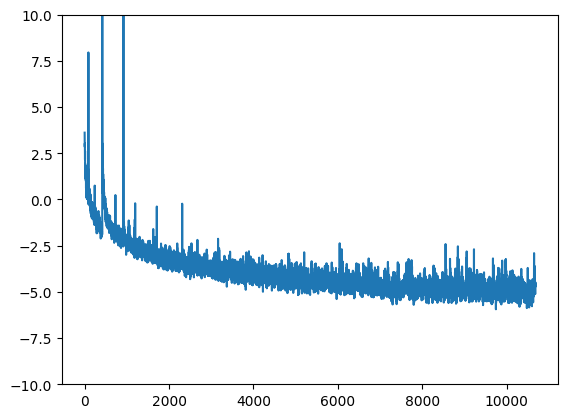

In [ ]:
plt.plot(model.loss_history)
plt.ylim(-10, 10)

## aaa

это код когда я просто проверяла модельку, запускать не нада

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_new[0], y_new[1], marker='.', label='Observations', linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
results1 = []
results2 = []
results3 = []
numb = 10 # 10

for i in range(numb):
  print(i)
  ids = pd.unique(train[['id']]. values.ravel())
  id1 = np.array([np.random.sample() for k in range(len(ids))])
  ar = []
  for j in range(len(ids)):
    if id1[j] <= 0.7:
      ar.append(ids[j])
  train = train.loc[train['id'].isin(ar)]
  scaler = make_pipeline(LogitScaler(eps=0.01), StandardScaler())
  y_tr_ss = scaler.fit_transform(train[['iops', 'lat']].values)
  y_test_ss = scaler.transform(test[['iops', 'lat']].values)
  stscaler = StandardScaler()
  X_tr_ss = stscaler.fit_transform(train[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  X_test_ss = stscaler.transform(test[['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  # model
  model = RealNVP(lr=0.001, n_layers=24, n_epochs=200, batch_size=64) # 200
  model.fit(y_tr_ss, X_tr_ss) # (target, condition)
  # samples 1
  y_test = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['iops', 'lat']].values)
  X_test = torch.tensor(test[test['id'] == 'hse-09132022-180712-z63065'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen = model.sample(stscaler.transform(X_test.clone().detach()))
  y_gen = scaler.inverse_transform(y_gen)
  if i == 0:
    results1.append(y_test)
  results1.append(y_gen)
  # samples 2
  y_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-203942-z36542'][['iops', 'lat']].values)
  X_test_2 = torch.tensor(test[test['id'] == 'hse-09132022-203942-z36542'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen_2 = model.sample(stscaler.transform(X_test_2.clone().detach()))
  y_gen_2 = scaler.inverse_transform(y_gen_2)
  if i == 0:
    results2.append(y_test_2)
  results2.append(y_gen_2)
  # samples 3
  y_test_3 = torch.tensor(test[test['id'] == 'hse-09132022-192053-z87989'][['iops', 'lat']].values)
  X_test_3 = torch.tensor(test[test['id'] == 'hse-09132022-192053-z87989'][['block_size', 'n_jobs', 'iodepth', 'read_fraction', 'io_type_num', 'n_disks']].values)
  y_gen_3 = model.sample(stscaler.transform(X_test_3.clone().detach()))
  y_gen_3 = scaler.inverse_transform(y_gen_3)
  if i == 0:
    results3.append(y_test_3)
  results3.append(y_gen_3)

0


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


1


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


2


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


3


<ipython-input-20-a80eb4482932>:15: RuntimeWarning: invalid value encountered in log
  logit = np.log(x_norm/(1-x_norm))


In [ ]:
colors = np.array(["blue","red","green","yellow","pink","black","orange","purple","brown","cyan","magenta"])

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results1[0][:, 0], results1[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results1[i][:, 0], results1[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results2[0][:, 0], results2[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results2[i][:, 0], results2[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(results3[0][:, 0], results3[0][:, 1], marker='.', label='Observations', color=colors[0], linewidth=1)
for i in range(1, numb+1):
  plt.scatter(results3[i][:, 0], results3[i][:, 1], marker='.', label='Generated with NF', color=colors[i], linewidth=1)

plt.xlabel("iops")
plt.ylabel("lat")
plt.grid()
plt.legend()
plt.show()